# Data Analysis of Important Factors in Influences the Used Cars Pricing In India Market

## (A) Introduction



## Domain background

In conjunction with the growing market of demand in the used cars in India , the consumers manually bring their cars down to workshops to estimate the selling price of their used cars. 

The estimation and evaluation process of the used cars pricing involve a lot of time and resources. 

As a results, the increasing of  the unwanted cost have affected the revenue of the company.



## Objective

#### Analyze and explore the relationship between the  factors versus the price to come out with valuable insights for the stakeholders in

1) efficiently allocating the resources

2) reducing the cost of  evaluating and estimating process of the used car pricing.

3) Save time for the workshop and customers

### Dataset : Used car

### About dataset

**Definitions of the columns are found below.**


**Name** :  The brand and model of the car

**Location** :The location in which the car is being sold or is available for purchase 

**Year** :	The year or edition of the model

**Kilometers_Driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type**	: The type of fuel used by the car

**Transmission** : 	The type of transmission used by the car

**Owner_Type** :	Whether the ownership is Firsthand, Second hand or other

**Mileage**	: The standard mileage offered by the car company in kmpl or km/kg

**Engine** :The displacement volume of the engine in cc

**Power**	: The maximum power of the engine in bhp

**Seats** :	The number of seats in the car

**New_Price** :	Price of new model

**Price** :	The price of the used car in INR Lakhs
	


## Important Factors

Base on our initial exploring and domain knowledges of the data set,
We found that  **KM Driven, Year and Name** seems to be the **first group of critical features** in providing the important information in our analysis in estimating and evaluating the used car pricing.

Follow by  **second group of important factors** such as Transmission ,Owner type, and Location.

**Third group of factors** are Mileage , Power and Engine



## Relevant questions to gain valuable insights


1) Which resale cars have higher pricing?


2) How does the characteristics of the cars affect the used car pricing?



3) Factors that influences differences between new price and  resales price?


4) What kind of new car have the high preserve value during resale?

## Summary

From the meaningful insights of quantitative and qualitative data analysis methods  ,we are able to provide the following solutions to our stakeholders: 

1) ***What are patterns and trends in the types of cars that people are considering reselling in the market.***

2) ***Awareness of the important features that influences the estimation and evaluation process of the used cars pricing.\
    Hence , enhancement of the efficiency in the evaluation process will reduce the cost and save time.***

Optional :  efficiently solving the problems in estimating the used cars pricing. (ML)


## Import Libraries 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

## (B) Data Understanding 

1) Import data set\
2) Basic statistcal 

### (1)Import Dataset 
### View some rows of datasets and statistical information

In [3]:
cars = pd.read_csv('cars.csv')
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
cars.shape

(6019, 13)

## Observation
There are 6019 rows and 13 columns 

In [5]:
## check the data types 

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


### Data type summary

2 integers (int64)\
2 floating (float64)\
9 objects (categorical)

### (2) Basic statictic of the data

In [6]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


### Observation

From the numeric data we can notice that :

**1) Year :**\
The year of cars edition are between 1998 to 2019 .\
The mean is 2013. Average of the car in the market are from the year of edition of 2013.

**2) KM Driven :**\
Average of Kilometer Driven is 58,738 km.\
The maximum is 6,500,000 km compare to minimum is only 171 km.\
Inspection of outliers needed as seems that there are several significant outliers for this data.

**3) Seats :**\
Average seats for the cars are 5.\
The max seat is 10 and the min seat 0.\
Impossible there are zero seat or 10 seat for a cars.\
Inspection needed, the values may act as outliers or the seats distribution due on prestige cars.

**4) Price :**\
Average price for the used car is 9.48 Lakh.\
The maximum price is 160 Lakh and the minimum price is 0.44 Lakh.\
Inspection needed to remove the outliers especially the maximum car price as the distance too far away from the mean price.


## (C) Data cleaning flow :

1) Conversion categorical data  to numeric data types (Continuos variables):\
   (a) Convert Engine columns to numeric data\
   (b) Convert Power columns to numeric data\
   (c) Convert Mileage column to numeric data\
   (d) Convert New Price column to numeric data
   
2) Split the name:\
   (a) Split the Name into Brand , Model, Variant (New Columns )

3) Create new columns\
   (a) Create new columns for Year\
   (b) Create a new columns for KM Driven

4) Check the missing values:\
   (a) New Price\
   (b) Mileage\
   (c) Power and Engine\
   (d) Seat

5) Checking on Duplicate data

6) Checking on the outliers:\
   (a) Seat\
   (b) Year\
   (c) Price\
   (d) KM_Driven
   
7) Inspect the data after data cleaning 

   


## (1) Conversion categorical data  to numeric data types (Continuos variables)

Mileage, Engine  and Power column need to convert to numeric data

### (a) Convert Engine columns to numeric data

In [7]:
## use regex str.repalce to remove CC and astype to convert to float data types

cars['Engine']=cars.Engine.str.replace('CC' ,'').astype(float)

cars.head()

## check the data set

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,NaN,17.74


### (b) Convert Power columns to numeric data

In [8]:
## check the Power data have noise null bhp

cars[cars.Power=='null bhp']

##use regex str to repalce with null bhp to numeric 0 , will do values imputation for '0' later on.

cars['Power'] = cars.Power.str.replace("null bhp" , '0' ) 
cars.head()

## use regex str .replace to convert to float data types

cars['Power']=cars.Power.str.replace('bhp' ,'').astype(float)

cars.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74


### (c) Convert Mileage column to numeric data

In [9]:
## remove kmpl using regex
cars['Mileage']=cars.Mileage.str.replace('kmpl' ,'')
cars.head()

## remove km/kg using regex
cars['Mileage']=cars.Mileage.str.replace('km/kg' ,'')
cars.head()

## use astype to convert to float data types
cars['Mileage']=cars.Mileage.astype(float)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### (d) convert New Price column to numeric data

In [10]:
cars['New_Price']=cars.New_Price.str.replace('Lakh' ,'')


cars['New_Price']=cars.New_Price.str.replace('Cr' ,'')

cars['New_Price']=cars.New_Price.astype(float)


cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## (2) Split the name 

### (a) Split the Name into Brand , Model, Variant (New Columns )

In [11]:
## create a new columns for Brand and use lamda function split the first index as brand 

cars['Brand'] = cars['Name'].apply(lambda x:' '.join(x.split()[:1]))

## create a new columns for Model and use lamda function to split the second index as model

cars['Model'] = cars['Name'].apply(lambda x:' '.join(x.split()[1:2]))

## create a new columns for variant and use lamda function to split the third index onwards as variant

cars['Variant'] = cars['Name'].apply(lambda x:' '.join(x.split()[2:]))

## convert to ISUZU to lower case 
cars['Brand']=cars['Brand'].apply(lambda x:' '.join(x.lower() for x in x.split()))

cars.head()




,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,maruti,Wagon,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,hyundai,Creta,1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,honda,Jazz,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,maruti,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,audi,A4,New 2.0 TDI Multitronic


## Checking on the data type

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5983 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
 13  Brand              6019 non-null   object 
 14  Model              6019 non-null   object 
 15  Variant            6019 non-null   object 
dtypes: float64(6), int64(2),

### Data type summary after conversion 

2 integers (int64)\
5 floating (float64)\
9 objects (categorical)

## (3) Create new columns 

### (a) Create new columns for Year 

In [13]:
## get the age of the cars
cars['Year_New'] = 2019 - cars['Year']

## check the data

cars.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,Year_New
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,maruti,Wagon,R LXI CNG,9
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,hyundai,Creta,1.6 CRDi SX Option,4
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,honda,Jazz,V,8
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,maruti,Ertiga,VDI,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,audi,A4,New 2.0 TDI Multitronic,6


### (b) Create a new columns for KM Driven

In [14]:
## convert the unit in one thousand
cars['KM_Driven'] = cars['Kilometers_Driven']/1000

## Drop the columns
cars.drop(['Kilometers_Driven'], axis=1 , inplace = True)
cars.head()

## check the data 
cars.head(20)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,Year_New,KM_Driven
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,maruti,Wagon,R LXI CNG,9,72.000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,hyundai,Creta,1.6 CRDi SX Option,4,41.000
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,honda,Jazz,V,8,46.000
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,maruti,Ertiga,VDI,7,87.000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,audi,A4,New 2.0 TDI Multitronic,6,40.670
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,hyundai,EON,LPG Era Plus Option,7,75.000
6,Nissan Micra Diesel XV,Jaipur,2013,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,nissan,Micra,Diesel XV,6,86.999
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,toyota,Innova,Crysta 2.8 GX AT 8S,3,36.000
8,Volkswagen Vento Diesel Comfortline,Pune,2013,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,volkswagen,Vento,Diesel Comfortline,6,64.430
9,Tata Indica Vista Quadrajet LS,Chennai,2012,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,tata,Indica,Vista Quadrajet LS,7,65.932


## (4) Check the missing data

In [15]:
## check the missing data 

missing_value =cars.isnull().sum()

## Observation

1) Mileage : 2\
2) Engine : 36\
3) Power : 36\
4) Seats : 42\
5) New Price : 5195



## (a) Missing values for New Price 

### The new price columns have 86% missing value. WIll still keep this column this data will produce valuable insights of the analysis.

### Impute the missing values using mean by matching the same model ,brand and variant .

In [16]:
## check the model 
cars.Model.nunique()

model_list = cars.Model.unique().tolist()

In [17]:
## check the brand 
cars.Brand.nunique()

brand_list = cars.Brand.unique().tolist()

In [18]:
## check the variant
cars.Variant.nunique()

variant_list = cars.Variant.unique().tolist()

In [19]:
## index 0 for cars data set
cars.shape[0]

6019

In [20]:
model_brand=[] ## create a empty list for model and brand
for i in range(0,cars.shape[0]):
    if (cars.loc[i,'Model'],cars.loc[i,'Brand']) not in model_brand: ## only the unique model and brand in the list
        model_brand.append((cars.loc[i,'Model'],cars.loc[i,'Brand'])) 
        
#model_brand

In [21]:
len(model_brand)

216

In [22]:
## use for  loop to impute the mean to missing values of same brand and model with mean
for i in model_brand:    
    cars['New_Price'][(cars['New_Price'].isnull()) & (cars['Model']==i[0]) & (cars['Brand']==i[1])] = cars['New_Price'][(cars['New_Price'].notnull()) & (cars['Model']==i[0])& (cars['Brand']==i[1])].mean()

## check the missing values
cars.isnull().sum()

C:\Users\65825\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Name               0
Location           0
Year               0
Fuel_Type          0
Transmission       0
Owner_Type         0
Mileage            2
Engine            36
Power             36
Seats             42
New_Price       1266
Price              0
Brand              0
Model              0
Variant            0
Year_New           0
KM_Driven          0
dtype: int64

In [23]:
## replace the brand missing values with mean

for i in brand_list:
    cars.New_Price[(cars.New_Price.isnull()) & (cars['Brand']==i)] = cars.New_Price[(cars.New_Price.notnull()) & (cars['Brand']==i)].mean()

cars.isnull().sum()

C:\Users\65825\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name              0
Location          0
Year              0
Fuel_Type         0
Transmission      0
Owner_Type        0
Mileage           2
Engine           36
Power            36
Seats            42
New_Price       128
Price             0
Brand             0
Model             0
Variant           0
Year_New          0
KM_Driven         0
dtype: int64

In [24]:
model_variant=[] ## create a empty list for model and variant
for i in range(0,cars.shape[0]):
    if (cars.loc[i,'Model'],cars.loc[i,'Variant']) not in model_brand: ## only the unique model and brand in the list
        model_brand.append((cars.loc[i,'Model'],cars.loc[i,'Variant'])) 
        
#model_variant

In [25]:
## use for  loop to impute the mean to missing values of same brand and model with mean
for i in model_variant:    
    cars['New_Price'][(cars['New_Price'].isnull()) & (cars['Model']==i[0]) & (cars['Variant']==i[1])] = cars['New_Price'][(cars['New_Price'].notnull()) & (cars['Model']==i[0])& (cars['Variant']==i[1])].mean()

## check the missing values
cars.isnull().sum()

Name              0
Location          0
Year              0
Fuel_Type         0
Transmission      0
Owner_Type        0
Mileage           2
Engine           36
Power            36
Seats            42
New_Price       128
Price             0
Brand             0
Model             0
Variant           0
Year_New          0
KM_Driven         0
dtype: int64

In [26]:
## replace the variant missing values based on variant mean

for i in variant_list:
    cars.New_Price[(cars.New_Price.isnull()) & (cars['Variant']==i)] = cars.New_Price[(cars.New_Price.notnull()) & (cars['Variant']==i)].mean()

cars.isnull().sum()

C:\Users\65825\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name              0
Location          0
Year              0
Fuel_Type         0
Transmission      0
Owner_Type        0
Mileage           2
Engine           36
Power            36
Seats            42
New_Price       113
Price             0
Brand             0
Model             0
Variant           0
Year_New          0
KM_Driven         0
dtype: int64

### Nothing much can do, decided to impute the 113 missing value of New Price with mean . Do not want to lost any of the important rows.

In [27]:
#cars.dropna(axis=0 , subset = ['New_Price'], how='any' , inplace = True)

In [28]:
cars['New_Price'] = cars.New_Price.fillna(cars.New_Price.mean())

In [29]:

cars['New_price']=cars.New_Price.round(2)

cars.drop(['New_Price'] , axis=1, inplace=True)

cars.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti,Wagon,R LXI CNG,9,72.00,5.49
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai,Creta,1.6 CRDi SX Option,4,41.00,16.40
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda,Jazz,V,8,46.00,8.61
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti,Ertiga,VDI,7,87.00,11.53
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi,A4,New 2.0 TDI Multitronic,6,40.67,52.51


In [30]:
cars.shape

## check the shape

(6019, 17)

In [31]:
cars.isnull().sum()

Name             0
Location         0
Year             0
Fuel_Type        0
Transmission     0
Owner_Type       0
Mileage          2
Engine          36
Power           36
Seats           42
Price            0
Brand            0
Model            0
Variant          0
Year_New         0
KM_Driven        0
New_price        0
dtype: int64

## (b) Missing values for Mileage

Decision : Drop the missing values

Reasons :

1) only 2 rows affected

2) Minor issue in affecting the data analysis

In [32]:
cars.dropna(axis=0 , subset = ['Mileage'] , how='any' , inplace=True)
cars.shape

(6017, 17)

## (c) Missing values for Power and Engine 

Decision : Imputation with median the missing values

**Reasons:**

From the box plot of Power and Engine data points, we note that the data is skewed.The data looks to be right skewed.

There are several data points act as outliers.

Outliers data points will have significant impact on the mean. Hence, it is not recommended to use mean for the Power and Engine missing values imputation.



###  Power

92.7


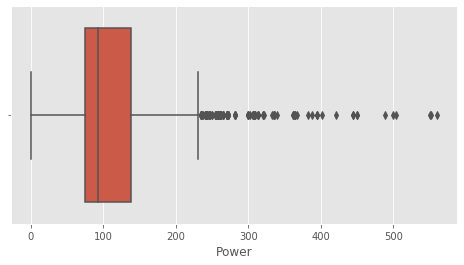

In [33]:
## using box plot to check on the Power data

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars.Power)

## get the median
median_Power = cars.Power.median()
print(median_Power)

## imputaion the missing values with median
cars.Power.fillna(median_Power , inplace =True)

### Engine

1493.0


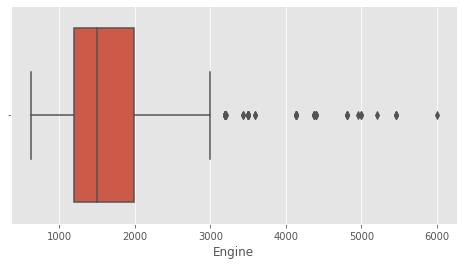

In [34]:
## using box plot to check on the Engine data

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars.Engine)

## get the median 
median_Engine = cars.Engine.median()
print(median_Engine)

## imputation the missing value with median
cars.Engine.fillna(median_Engine , inplace =True)

### (d) Missing values for Seats columns

Decision : Impute the missing values with mod

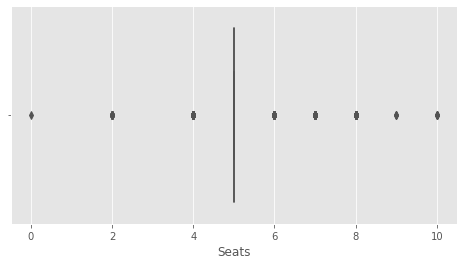

In [35]:
## using box plot to check on the Seat data

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars.Seats)

## imputation the missing value with median
cars['Seats'] = cars['Seats'].fillna(cars['Seats'].mode()[0])

In [36]:
cars.shape

(6017, 17)

### There are 6017 rows and 17 columns after imputaion and data celaning

### Inspect the missing values after imputation and  data cleaning

In [37]:
cars.isnull().sum()

Name            0
Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
Seats           0
Price           0
Brand           0
Model           0
Variant         0
Year_New        0
KM_Driven       0
New_price       0
dtype: int64

## (5) Checking on duplicate data

In [38]:
cars.drop_duplicates()
cars.shape

(6017, 17)

### No duplicate data

## (6) Checking on the Outliers

#### What is outliers?

Definition of outliers. 

An outlier is an observation that lies an abnormal distance from other\
values in a random sample from a population.

The outliers will affects the results and assumptions of the analysis.

Hence, before decided to drop the outliers , there are few factors need to take into consideration before remove them.

#### When  to drop the outliers?

1) Incorrectly entered or measured data (human errors).

2) Does not change the results but  affect the assumptions from analysis.

3) Creates a significant association to avoid the relationshop of features (X) and target (Y) are created by outliers.

## Seats

### Inspection of cars with zero seats ,2 seats and 10 seats

In [39]:
## checking the cars with 0 seats
cars[cars['Seats']==0].head()

## checking the same model with diffrent seat
cars[cars['Name']=='Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,Petrol,Automatic,First,10.5,3197.0,0.0,0.0,18.0,audi,A4,3.2 FSI Tiptronic Quattro,7,125.0,52.51


### Replace the car seat with 2 seated

In [40]:
## get the location and replace
cars.loc[3999,'Seats']=2.0

## check the data
cars[cars['Name']=='Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,Petrol,Automatic,First,10.5,3197.0,0.0,2.0,18.0,audi,A4,3.2 FSI Tiptronic Quattro,7,125.0,52.51


In [41]:
## checking the cars with 2 seats
cars[cars['Seats']==2].head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,Petrol,Automatic,First,19.0,2996.0,362.07,2.0,54.00,mercedes-benz,SLC,43 AMG,2,13.372,95.04
557,Audi TT 2.0 TFSI,Delhi,2013,Petrol,Automatic,First,9.9,1984.0,207.80,2.0,29.50,audi,TT,2.0 TFSI,6,12.100,52.85
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,Petrol,Automatic,First,18.1,3498.0,306.00,2.0,55.54,mercedes-benz,SLK-Class,SLK 350,3,22.732,60.73
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,Petrol,Automatic,First,18.1,3498.0,306.00,2.0,55.00,mercedes-benz,SLK-Class,SLK 350,4,10.000,60.73
915,Smart Fortwo CDI AT,Pune,2008,Diesel,Automatic,Second,0.0,799.0,0.00,2.0,3.00,smart,Fortwo,CDI AT,11,103.000,19.46


In [42]:
## checking the cars with 10 seats
cars[cars['Seats']==10].head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
814,Toyota Qualis FS B2,Pune,2004,Diesel,Manual,Second,13.10,2446.0,75.0,10.0,3.50,toyota,Qualis,FS B2,15,77.757,24.61
917,Tata Sumo DX,Mumbai,2013,Diesel,Manual,First,14.07,1978.0,83.1,10.0,5.25,tata,Sumo,DX,6,20.000,10.09
1907,Toyota Qualis FS B3,Bangalore,2002,Diesel,Manual,Third,13.10,2446.0,75.0,10.0,3.65,toyota,Qualis,FS B3,17,63.000,24.61
2267,Toyota Qualis RS E2,Pune,2004,Diesel,Manual,Second,0.00,2446.0,0.0,10.0,3.50,toyota,Qualis,RS E2,15,215.750,24.61
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,Diesel,Manual,First,14.80,2499.0,80.0,10.0,5.50,chevrolet,Tavera,LS B3 10 Seats BSIII,4,120.000,19.46


### Observation form the inspection

There are not acting as outliers.

The nature of the outliers due to prestige car .

### Year

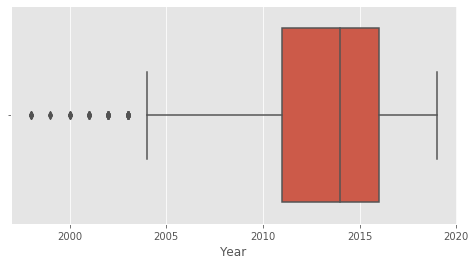

In [43]:
## check the year outliers using box plot

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars.Year)

### Not to remove the outliers

Reason : The nature of the year of edition from 1998 to 2019.

### Price

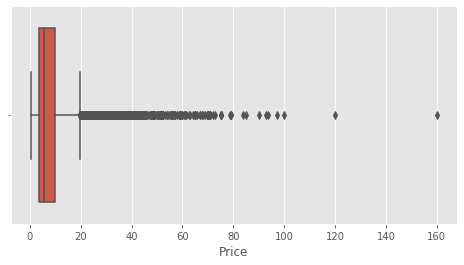

In [44]:
## using boxplot to check on outliers

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars.Price)

In [45]:
## check on the car price = 160 Lakh
cars[(cars['Price']==160)]

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,land,Rover,Range Rover 3.0 Diesel LWB Vogue,2,25.0,2.3


In [46]:
## check on the car price = 120 Lakh
cars[(cars['Price']==120)]

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
5781,Lamborghini Gallardo Coupe,Delhi,2011,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.0,lamborghini,Gallardo,Coupe,8,6.5,1.28


### Not to remove  the outliers

The Land Rover and Lamborghini are the luxury cars.

Not surprise that we have significant outliers values.

### Kilometres Driven

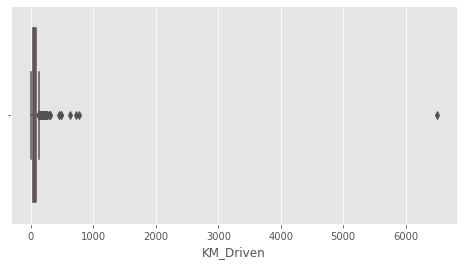

In [47]:
## using boxpolt to check on KM Driven outliers

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars.KM_Driven)

In [48]:
## check the model which has the KM Diven of more than 6,000,000 km
cars[(cars['KM_Driven']>=6000)]

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,bmw,X5,xDrive 30d M Sport,2,6500.0,55.12


In [49]:
## check the same model and Km driven
cars[(cars['Name']=='BMW X5 xDrive 30d M Sport')]

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,bmw,X5,xDrive 30d M Sport,2,6500.0,55.12
4101,BMW X5 xDrive 30d M Sport,Chennai,2016,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,57.0,bmw,X5,xDrive 30d M Sport,3,45.0,55.12
5740,BMW X5 xDrive 30d M Sport,Chennai,2017,Diesel,Automatic,Second,15.97,2993.0,258.0,5.0,55.0,bmw,X5,xDrive 30d M Sport,2,21.0,55.12


### Drop the outliers

Obviously this is a outliers (maybe due to wrong key in data ) the car has so high KM Driven just only for 2 years (year of edition ==2017).

Comparison to the same model(BMW X5 xDrive 30d M Sport) ,same year(2017) ,same location (Chennal) , the KM Drive is 21,000 KM for 2 years.


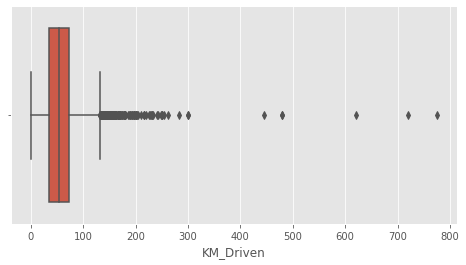

In [50]:
##Drop the outlier
cars1 = cars[(cars['KM_Driven']<=1000) & (cars['KM_Driven']>=0)]

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(cars1.KM_Driven)                                   

In [51]:
## check the shape after remove the outlier
cars1.shape

(6016, 17)

In [52]:
cars1.shape
## check on the shape 

(6016, 17)

## (7) Inspection the data after data cleaning

### Use of cars1  as data frame for data analysis 

###  6016 rows of inspections and 17 columns


# (D) EDA (Exploratory Data Anaysis) and Data Visualization

## (a) Analys each of the features
## (b) Analys each features versus Price : Miltivariate comparison between variables X and target Y (Price)

###  Let's have a look at the price distribution as a starting point before move further on.


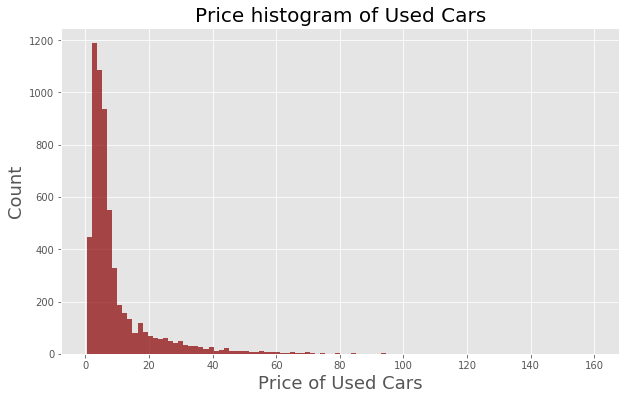

In [53]:
## histogram to view the price distribution

plt.xlabel("Price of Used Cars",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Price histogram of Used Cars",fontsize=20)
cars1['Price'].hist(bins=100,color='darkred',alpha=0.7,figsize=(10,6))

### From the price histogram above , the bars are skewed to the left.

In [54]:
len(cars1[(cars1['Price']>65)])

32

#### Since there are 32 used cars are aboved the price of 65 Lakh, we deleted it.

### For better visualization on the price histogram, we transform using logarithmic scale to have a better view. 

## using logrithmic scale to view price distribution

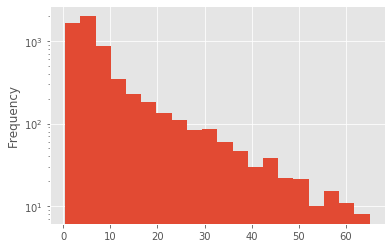

In [55]:
fig,ax = plt.subplots()
ax.set_yscale('log')
cars1[(cars1['Price']<= 65) & (cars1['Price']>0)]['Price'].plot.hist(bins=20)

### Observation 

We can see from the price distribution, there are 4 ranking of the used cars price as follow : 

1) majority of the used cars price range below 10 Lakh , the mean price is 9.47 Lakh\
2) second range from 10 Lakh to 25 Lakh\
3) third range from 25 Lakh to 45 Lakh\
4) and 45 and above

###  Let's have a look at the new price distribution 


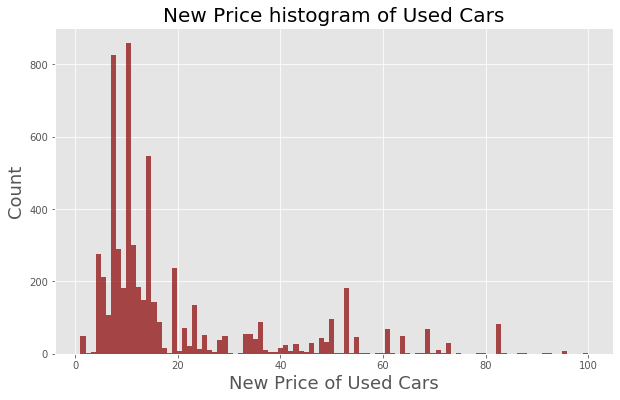

In [56]:
## histogram to view the price distribution

plt.xlabel("New Price of Used Cars",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("New Price histogram of Used Cars",fontsize=20)
cars1['New_price'].hist(bins=100,color='darkred',alpha=0.7,figsize=(10,6))

In [57]:
cars1.New_price.mean()

19.45894115691518

In [58]:
cars1.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti,Wagon,R LXI CNG,9,72.00,5.49
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai,Creta,1.6 CRDi SX Option,4,41.00,16.40
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda,Jazz,V,8,46.00,8.61
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti,Ertiga,VDI,7,87.00,11.53
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi,A4,New 2.0 TDI Multitronic,6,40.67,52.51


#### Average price for new cars are 19.46 Lakh

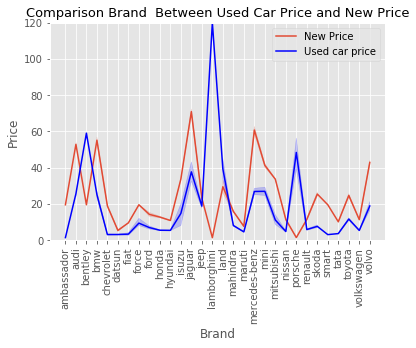

In [59]:
# gca stands for 'get current axis'
ax = plt.gca()
#plt.figure(figsize=(20,10))
fig.set_size_inches(30,50) 

plt.title('Comparison Brand  Between Used Car Price and New Price', fontsize=13)
#ax1 = 
sns.lineplot(data = cars1 , x="Brand" , y = 'New_price' , ax=ax , label='New Price')
#ax.set_ylabel("New Price",fontsize=18, color='red' )
#ax.set_xlabel("Brand",fontsize=18 ,color="green")
plt.xticks(rotation=90)
plt.ylim((0,120))

#ax1 = ax1.twinx()

#ax1=
sns.lineplot(data = cars1 , x="Brand" , y = 'Price' , color='blue' ,ax=ax , label = "Used car price")
#ax1.set_ylabel("Price", fontsize=18, color="blue")

#### Observation

1) The gap between the new cars price and the used cars can tell which Brand have a good preserve values during resales. 

2) There are :  Honda, Hyundai, Isuzu, Toyota , Datsun and Maruti.

 




###  (1) Brand

### The brand of the vehicle could have significant impact on the used car resale value, regardless of the quality or condition of the car. 


### How many brand are there in the market ?

In [60]:
## value count the brand
cars1.Brand.nunique()

30

#### There are 30 brand in the used cars market.

### Which brand are the most in the market?

In [61]:
## value counts 
cars1.Brand.value_counts().nlargest()

maruti           1211
hyundai          1107
honda             608
toyota            410
mercedes-benz     318
Name: Brand, dtype: int64

In [62]:
## convert to percentage
cars1_per = cars1.Brand.value_counts(1)*100
cars1_per.head()


maruti           20.129654
hyundai          18.400931
honda            10.106383
toyota            6.815160
mercedes-benz     5.285904
Name: Brand, dtype: float64

### Brand vs Price

Text(25, 12, 'Average  = 9.47 Lakh')

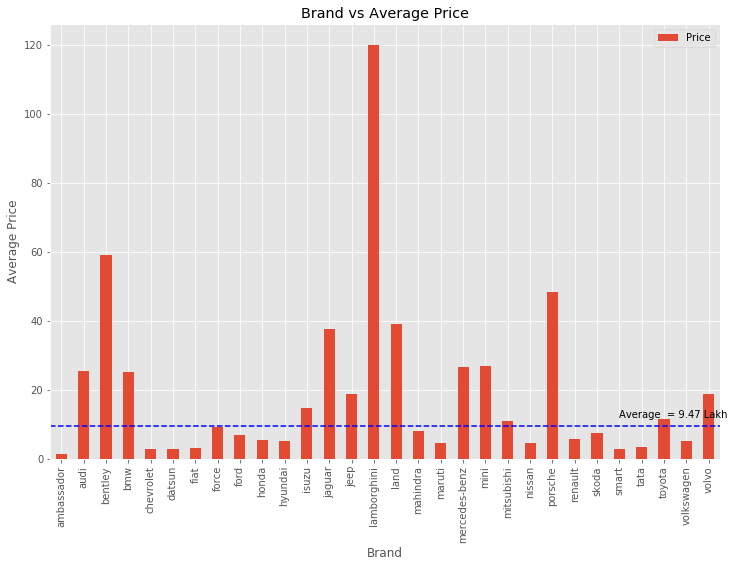

In [63]:
## new variables from pivot table for Brand and get the average price ,default of pivot table == aggregate the mean
cars1_bar = cars1.pivot_table( index =['Brand'], values ='Price')

#Create figure and axis
fig, ax = plt.subplots(figsize = (12,8))

# Create the bar chart
cars1_bar.plot(kind= "bar",  ax=ax)

# set xy label and title
ax.set_xlabel("Brand")
ax.set_ylabel('Average Price')            
ax.set_title('Brand vs Average Price')

# Add vertical average line
mean_price = cars1.Price.mean()
ax.axhline(mean_price , color = "b", linestyle = "--")
text = "Average  = %0.2f Lakh" %mean_price
ax.annotate(text, xy = (25, 12))

## Observation

**From the graph:**

1) Maruti, Hyundai and Honda domain the market with 20% ,18% and 10% . Nevertheless, they are slightly below the average price.

2) For Toyota, Mitsubishi, Force, and Isuzu are above the average price in the market.

Maruti           20.036826\
Hyundai          18.413124\
Honda            10.060261\
Toyota            6.846334


Maruti cover the 20% of the used car market in India.

**Self - inspection** :Even though the model car for Japan and German have the high retain values in resale market, but the local brand Maruti seems has high demand in used car market. Reason behind could be associate to the buying power and affordability of the consumers in India.


***Maruti Suzuki India Limited, formerly known as Maruti Udyog Limited, is an Indian automobile manufacturer headquartered in New Delhi.***--- Google search


### (2) Kilometres Driven

### Is a good indicator  of the vehicle's wear and tear.

In [284]:
## count on Mileage
cars1.KM_Driven.value_counts().nlargest()

60.0    82
45.0    70
65.0    68
70.0    60
50.0    60
Name: KM_Driven, dtype: int64

#### The majority KM driven are 60 KM.

### KM Driven vs Price

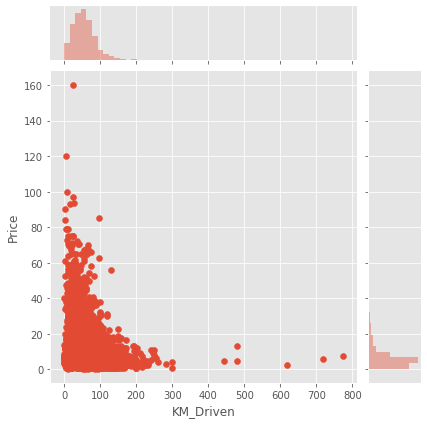

In [285]:
#Create figure and axis


sns.jointplot(x="KM_Driven", y="Price", data=cars1);



## Observation

**From the join plot:**

1) Obviously, the higher the kilometers you have drived , the lower the used cars price.

2) A car with high KM Driven  means that the cars has been used through and through.

3) From consumers  perspective,  the first problem that used car owners need to solve is  the issue of maintenance.

Hence, The higher the KM driven could have the higher likelihood of breaking down.  For this reason, buyers would usually prefer to spend more money on a vehicle with lower kilometer drive instead. A used car tends to have more wear and tear than a brand new car.

4) A used car with low KM Driven could have gold mine in the market and this would be a **crucial features** in used cars **pricing determination.**

Google search:\
As a rule of thumb, the average car will rack up 20,000 km per year — the distance manufacturers use to determine standard warranty coverage. A seven-year-old model should have 140,000 to 150,000 km on the odo. If it has traveled considerably more, deduct cash for high mileage.May 27, 2011



### (3) Year

### The lifetime for the vehicles.

### How does the used cars market look likes over the years of edition?

In [286]:
## calye counts to get the total
cars1.Year.value_counts().nlargest()

2014    797
2015    744
2016    740
2013    649
2017    586
Name: Year, dtype: int64

In [287]:
cars1.Year_New.value_counts().nlargest()

5    797
4    744
3    740
6    649
2    586
Name: Year_New, dtype: int64

#### The cars with more than 5 years are the most in the used cars market.

### View the trend based on Year

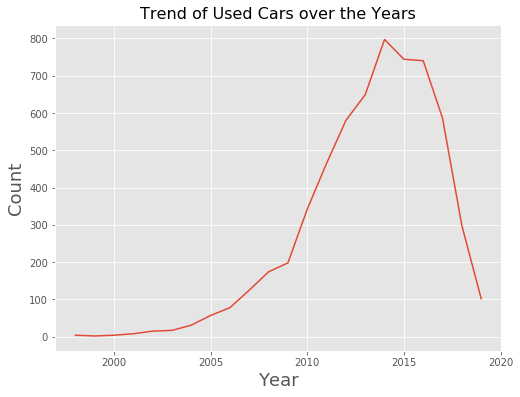

In [288]:
## save the count to a variable
cars1_year =cars1.Year.value_counts()

## set the fisure size
plt.figure(figsize=(8,6))

## set the xy lables and title
plt.xlabel("Year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title('Trend of Used Cars over the Years', fontsize=16)

## plot the count with seaborn line plot
sns.lineplot(data=cars1_year)

### Observation

Can see from the line plot above , the used cars edition from year 2010 to 2014 being resell in the market increase dramastically and drop faster for the car with edition year of 2015. 

We said that the owner will keep using the cars if the cars' age are within 5 years and will condiser to resell to market after 5 years.

### Year vs Price

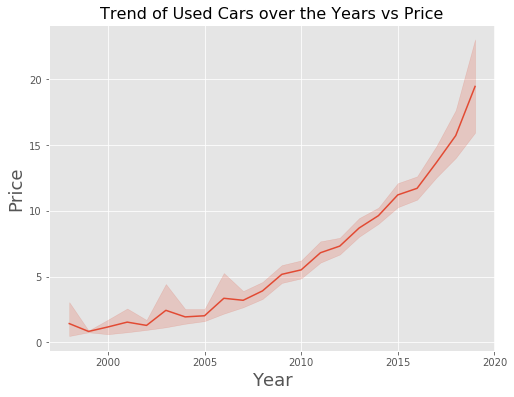

In [289]:
## fix the figure
plt.figure(figsize=(8,6))

## set the xy label adn title
plt.xlabel("Year",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title('Trend of Used Cars over the Years vs Price', fontsize=16)

## plot the trend with seaborn line plot
sns.lineplot(data=cars1 , x='Year' , y= 'Price')

## Observation

**From the line chart:**

1) It's a very simple interpretation of relationship between year and car.
   The year and price are related positively. The younger the age of the car the higher the price.





### (4)  Transmission 

### Referring to the  gearbox in the car
### The gearbox is responsible for efficient driving
### Converting speed and momentum into power then gets the entire car moving.
### The main objective  is to make the engine as efficient as possible by reducing the amount of fuel consumption.

### How about the percentage of Used Cars Transmission?

In [290]:
## value count to get the count of transmission and (1) to convert to percentage

cars1['Transmission'].value_counts(1)

Manual       0.714594
Automatic    0.285406
Name: Transmission, dtype: float64

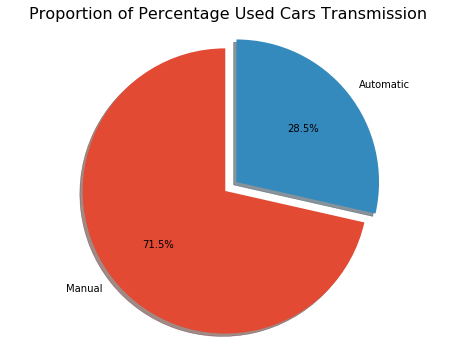

In [291]:
## set the label
labels = 'Manual', 'Automatic'
sizes = cars1['Transmission'].value_counts() 
        
## set the explode cell to have a significant view the the largest proportion
explode = (0, 0.1)

## set the figure size
fig1, ax1 = plt.subplots(figsize=(8, 6))

## set the angel , float and title
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Percentage Used Cars Transmission ", size = 16)

plt.show()



### Observation

There are 71% of the used cars are manual cars.  Majority of the car owner tend to get rid of the manual cars . 

### Transmission vs Price

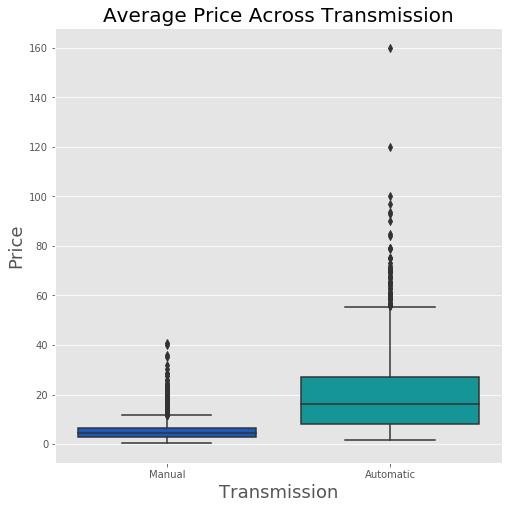

In [292]:
## set the figure size
plt.figure(figsize=(8, 8))

## set the xy label and title
plt.xlabel("Transmission",fontsize=18)
plt.ylabel("Average Price",fontsize=18)
plt.title('Average Price Across Transmission', fontsize=20)

## boxplot to view the trend
sns.boxplot(x='Transmission',y='Price',data=cars1,palette='winter')

### Observation

**From the boxplot:**

1) The price for automatic vehicles are more higher than the manual vehicles.


**General inforamtion:**

According to Car and Driver(research):\
An optional feature adds value if it's something that 50 percent or more of buyers choose to add when the vehicle is new. Opting out of these popular features or choosing unpopular features, such as a manual transmission, adds no value and may even reduce it. The lesson: When you're buying a new car, by all means, get what you want. Just don't be surprised later if following your heart leads to a reduced value on the used car market.

### (5) Location

### A location is the place where a particular point or object exists.

### A place's absolute location is its exact place on Earth, often given in terms of latitude and longitude.

### Where are the city of  India have the most used car?

In [293]:
## get the location 
cars1.Location.nunique()

print('There are {} locations in total.'.format(cars.Location.nunique()))


There are 11 locations in total.


In [294]:
## value counts on location and nlargest(10) to see the ranking 

cars_Location = cars1.Location.value_counts().nlargest(10)
cars_Location

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       492
Jaipur        413
Bangalore     358
Name: Location, dtype: int64

### Observation

Mumbai has the most  used car of 784 in total follow by Hyderabad , 741 and Kochi, 648

Mumbai (formerly called Bombay) is a **densely populated** city on India’s west coast.
A **financial center**, it's India's **largest city**. 
On the Mumbai Harbour waterfront stands the iconic Gateway of India stone arch, 
built by the British Raj in 1924. Offshore, 
nearby Elephanta Island holds ancient cave temples dedicated to the Hindu god Shiva.
The city's also famous as the heart of the ***Bollywood film industry.***---Google\
**Population: 18.41 million (2011)**


### Location vs Price

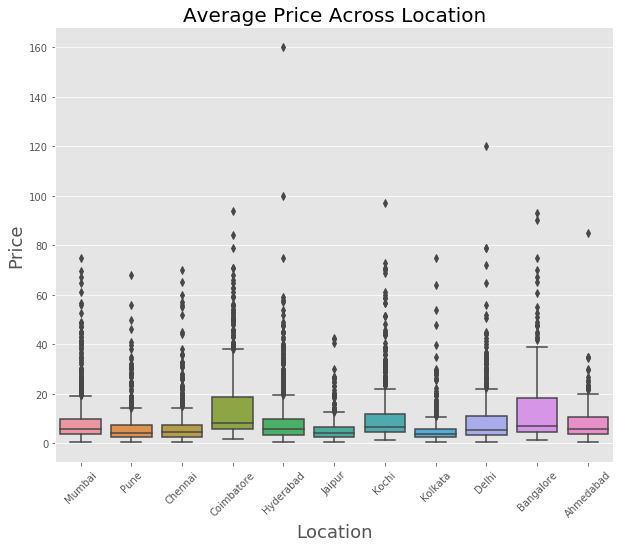

In [295]:
## set the figure size
plt.figure(figsize=(10, 8))

## set the xy label and title
plt.xlabel("Location",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title('Average Price Across Location', fontsize=20)

## seaborn to boxplot the trend
sns.boxplot(x='Location',y='Price',data=cars1)
plt.xticks(rotation=45);

### Observation

From the boxplot:

1) The price of the used car for Coimbatore , Kochi, Bangalore and Ahmedabad are higher comparison to other locations.(Refer to footnote 1)

2) It is interesting that the used car at Mumbai are the highest but the price lower than Coimbatore ranking number 4.(refer footnote 2)

3) The price of the car could influences by the wheather based on the location you stay.

4) Where you live can significantly influence its resale value. 


### (6) Fuel Type 
### A fuel is any material that can be made to react with other substances so that it releases energy as heat energy or to be used for work.

In [296]:
## count the Fuel Type 

cars_Fuel = cars1.Fuel_Type.value_counts()
cars_Fuel

## four types of fuel

Diesel    3204
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

#### Most of the car using the Disesel as the fuel comsumption

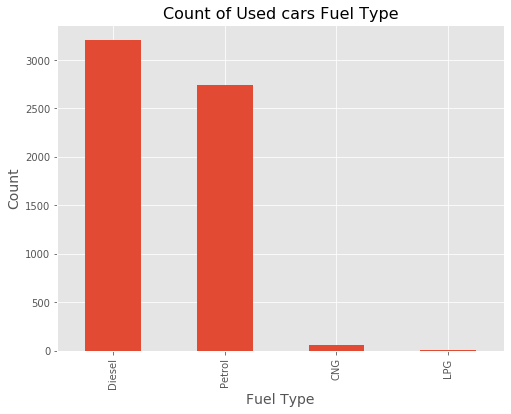

In [297]:
## Bar plot to view the count

plt.figure(figsize=(8,6))
plt.xlabel("Fuel Type",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title('Count of Used cars Fuel Type', fontsize=16)
cars_Fuel.plot(kind='bar')

In [298]:
## inspect on the brand vs fuel type
cars1.groupby('Brand')['Fuel_Type'].value_counts().sort_values(ascending=False).head()

Brand    Fuel_Type
hyundai  Petrol       742
maruti   Petrol       693
honda    Petrol       482
maruti   Diesel       464
hyundai  Diesel       356
Name: Fuel_Type, dtype: int64

### Observation

Diesel cars are the most in the resell maket compare to petrol fuel.

Reasons :

1) Driving experience:\
petrol engines tend to be less noisy.

2) Price :\ 
This phenomenon due to the fuel price in India. The Diesel price are more cheaper comparison to petrol. To own a diesel car in India is still considering worth for money and economical.


3) Maintenance :\ 
It's normal for your car's gasoline engine to run for around 200,000 miles before it needs a serious overhaul, or you need a new vehicle. But diesel engines can continuously run for an impressive 1,000,000-1,500,000 miles before needing any major work---Google search

4) From geographical situation of India:\
one's may need to travel a long distance from one point to another and the diesel consumption car just have a good match with this.

5) Benefits of Diesel engines :---Google search (Time of India) Dr. Partha Datta\
---more efficient and use 15−20% less fuel translating into cheaper running costs\
---fuel efficient, durable and delivered more hauling power\
---more power when dealing with steep hill

### (7) Owner Type

### How many  owners have the vehicle being transfered to.

In [299]:
## count of the owner type 

cars_owner = cars1.Owner_Type.value_counts()
cars_owner

## four owner types

First             4926
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [300]:
## get the percentage
cars_owner = cars1.Owner_Type.value_counts(1)*100
cars_owner

First             81.881649
Second            16.090426
Third              1.878324
Fourth & Above     0.149601
Name: Owner_Type, dtype: float64

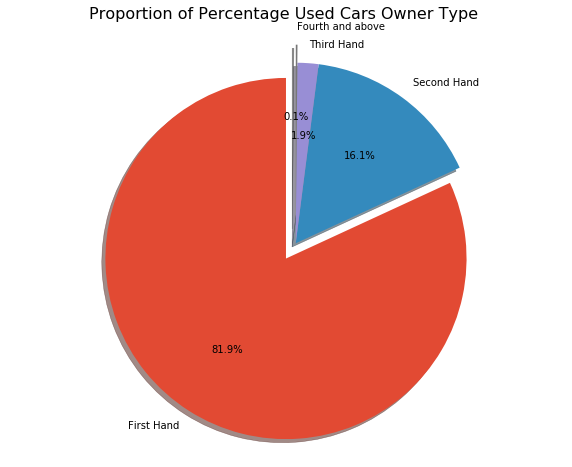

In [301]:
## label
labels = 'First Hand', 'Second Hand' , 'Third Hand ' , 'Fourth and above'
sizes = cars1.Owner_Type.value_counts()
        
## explode from the major propotion
explode = (0.1,0,0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Percentage Used Cars Owner Type ", size = 16)

plt.show()


### Observation 

Total of the first hand cars in the market is 4889 which is covered 82% in the market. Why?

Covid-19 pandemic has affected the economy badly. 

Due the high rate of unemployment and retrenchment, 

owner who not affordable to continuing paying the installment will consider to sell the car. 

On the other hand , the used car market is one of the hottest, coronavirus markets for consumers.

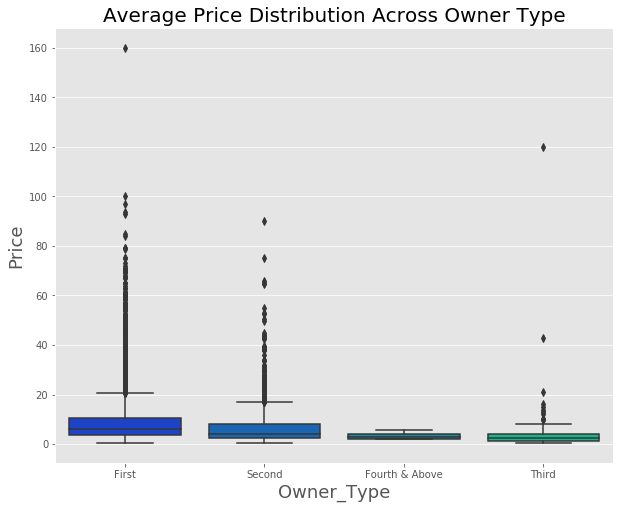

In [302]:
## Boxplot to view the relatioship by average of the price 

## set the figure size
plt.figure(figsize=(10, 8))

## set xy label and title
plt.xlabel("Owner Type",fontsize=18)
plt.ylabel("Average Price",fontsize=18)
plt.title('Average Price Distribution Across Owner Type', fontsize=20)

## seaborn boxplot to view the trend
sns.boxplot(x='Owner_Type',y='Price',data=cars1,palette='winter')

### Observation

From the box plot show that : 

1) Price vs Owner type : 

The average price drop gradually from first hand cars to second hand cars and so on. 

Means that the more the cars transfer to different owner the more depreciated the value of the cars.



## (8) Power ,Engine, Seats and Mileage vs Price

### Power is about the speed of the cars
### Engine is the heart of the car, convert heat from burning gas and move the vehicle.

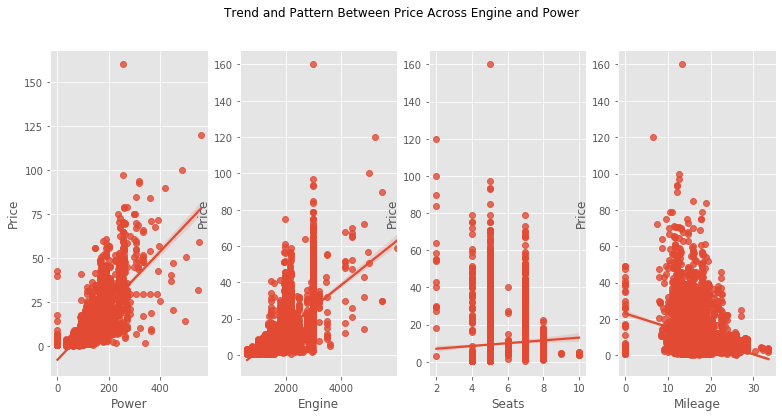

In [303]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1 ,  ncols=4, figsize = (13,6))

fig.suptitle('Trend and Pattern Between Price Across Engine and Power')

sns.regplot(x="Power", y="Price", data=cars1 ,ax=ax0)

sns.regplot(x="Engine", y="Price", data=cars1 , ax=ax1)

sns.regplot(x="Seats", y="Price", data=cars1 , ax=ax2)

sns.regplot(x="Mileage", y="Price", data=cars1 , ax=ax3)

### Observation

1) Power (CC)Engine capacity , and Engine (bhp)brake horsepower: 

The power and engine are positive related to price.

The more better the performances of the power and engine, the better of the price.

2) Seats: 

The relationship between seats and price are not strong , but can see the more seats of the cars the price slightly higher.

3) 
Obviously the relatioship of the Mileage and Price are negatively related. The Mileage for the cars are compound around 10 kmpl to 20 kmpl


### (1) Visualization of  Relationship between features vs target (Price)

### View the overall relationship .

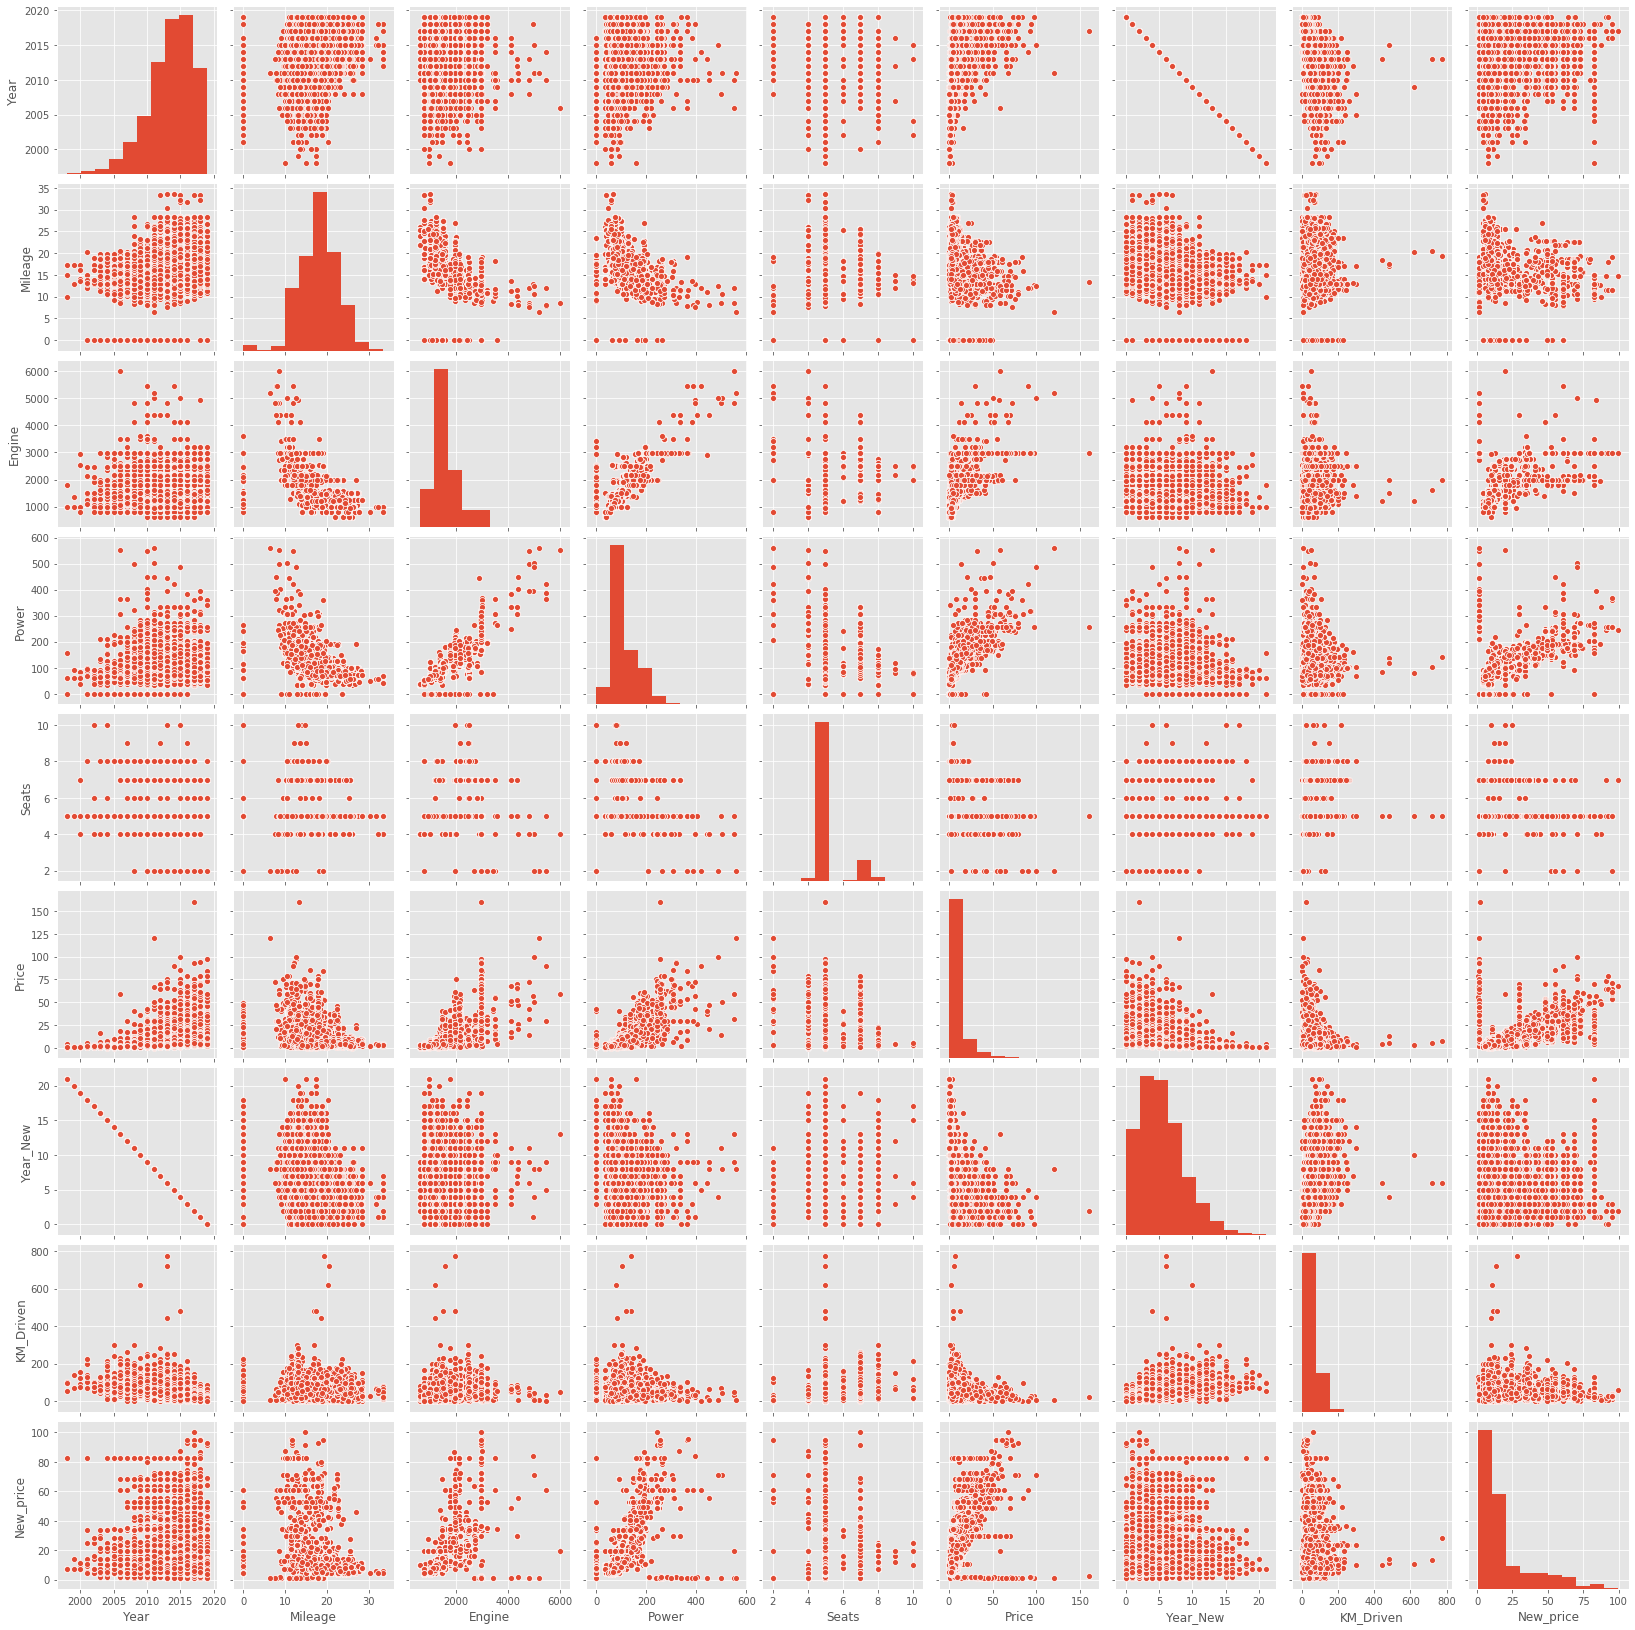

In [304]:
# scatterplots of all features 

sns.pairplot(cars1)

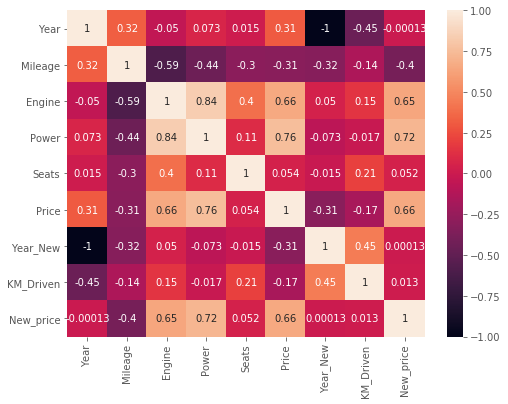

In [305]:
# Visualize features (X) against target (y), Price

plt.figure(figsize = (8, 6))
sns.heatmap(cars1.corr(), annot = True)

### Observation

**From the heatmap and pair plot:**

The heatmap  shows the covariance degrees via color intensity.

The lighter the color, the higher the covariance of the two variables.

We see that ‘Engine’  and 'Power' has a strong positive impact on itself and on ‘Price’. This inherently makes sense that the more better your engine and power perform , the better the price of your used cars. Again, this is where domain knowledge is so
important.

However, 'Kilometer driven' and 'year of edition' has negative impact on 'Price'. This also make sense that the more you drive the lower the value of the used cars and he new cars will have the higher value when you resell in the market.


## Interesting insights 

 ### How about the  Average Price across Location and Owner Type of the used cars ?

### Inspection before dropping the Porsche and Lamborghini

Text(0.5, 1.0, 'Trend Comparison Between Average Price vs Location and Owner Type of the used cars ')

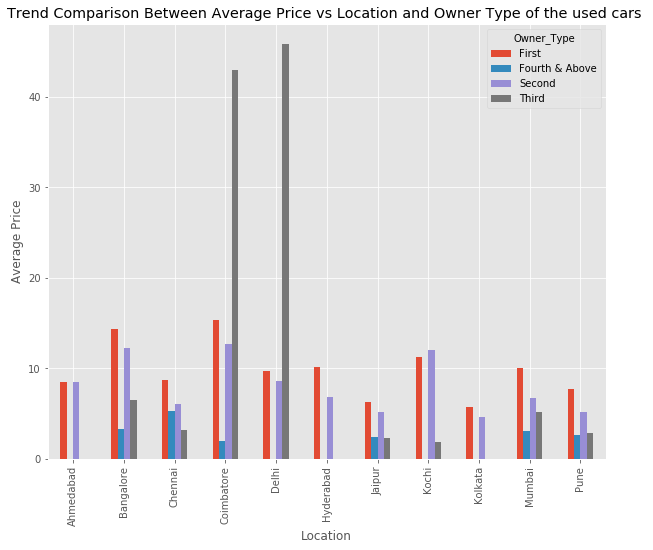

In [306]:

## using pivot table for multivariate comparison

cars1.pivot_table( index =['Location'],columns ='Owner_Type',values ='Price').plot.bar(figsize=(10,8))

plt.ylabel("Average Price")
plt.title('Trend Comparison Between Average Price vs Location and Owner Type of the used cars ')


### Inspection after dropping the Porsche and Lamborghini

In [307]:
## check the data
#cars[cars['Location']=='Coimbatore']

cars1[(cars.Location == 'Coimbatore') & (cars.Owner_Type.isin(['Third']))] 

C:\Users\65825\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,Petrol,Automatic,Third,8.0,4806.0,394.3,4.0,42.91,porsche,Panamera,2010 2013 4S,9,42.4,1.36


In [308]:
cars1[(cars1.Location == 'Delhi') & (cars1.Owner_Type.isin(['Third']))] 

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
3876,Honda Accord VTi-L AT,Delhi,2009,Petrol,Automatic,Third,11.10,2354.0,142.0,5.0,3.50,honda,Accord,VTi-L AT,10,65.462,12.68
4577,BMW 5 Series 520d Sedan,Delhi,2012,Diesel,Automatic,Third,18.48,1493.0,92.7,5.0,13.85,bmw,5,Series 520d Sedan,7,72.000,68.54
5781,Lamborghini Gallardo Coupe,Delhi,2011,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.00,lamborghini,Gallardo,Coupe,8,6.500,1.28


In [309]:
cars2_drop = cars.drop([2978,5781])

Text(0.5, 1.0, 'Trend Comparison Between Average Price vs Location and Owner Type of the used cars ')

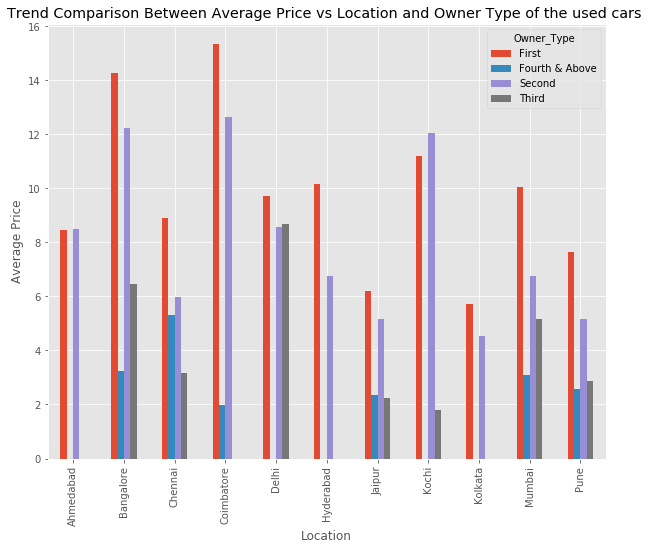

In [310]:
## using pivot table for multivariate comparison

cars2_drop.pivot_table( index =['Location'],columns ='Owner_Type',values ='Price').plot.bar(figsize=(10,8))

plt.ylabel("Average Price")
plt.title('Trend Comparison Between Average Price vs Location and Owner Type of the used cars ')

### Observation

The price for first hand cars at Coimbatore and Bangalore are high at the average price compare to other city around 14 to 15 Lakh.

This average price are 1.5 times higher then the average price of the market which is 9.48 Lakh.

First and second cars price are high at Coimbatore comparison to other location.

This phenomenon could be caused by the high demand for first and second hand cars at Coimbatore.

### What are the trend of Average Price to the age of the car and location?

Text(0.5, 1.0, 'Trend Comparison Between Average Price vs Location and Owner Type of the used cars ')

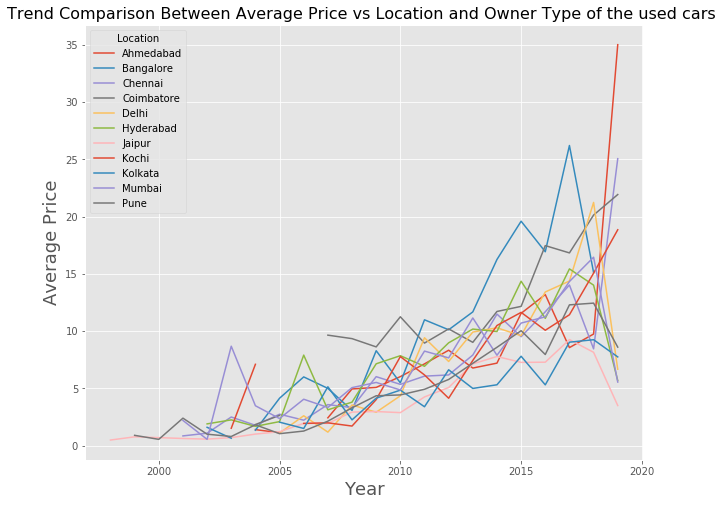

In [311]:
## pivot table to view the relationship

cars1_pivot =cars1.pivot_table( index ='Year',columns ='Location',values ='Price').plot.line(figsize=(10,8))


plt.xlabel("Year",fontsize=18)
plt.ylabel("Average Price",fontsize=18)
plt.title('Trend Comparison Between Average Price vs Location and Owner Type of the used cars ', fontsize=16)

#sns.lineplot(data=cars1_pivot)



### Observation

Even there are growing market in the used car in India.

The average price range are different from all over the India.

With comparison among the year and average price, we found that :

The cars price are increased for the following location compare to the others:

1) Ahmedabad
2) Kochi
3) Chennai
4) Coimbatore

### What are the pattern of Price acorss Fuel Type and Owner Type ?

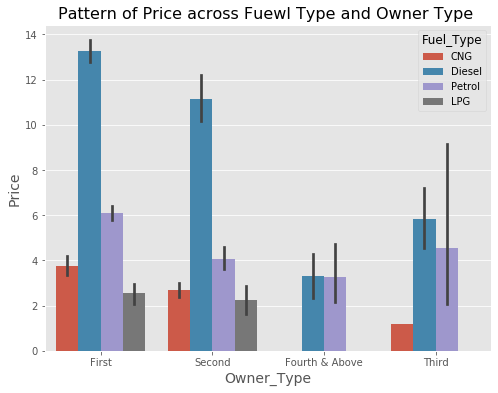

In [312]:
plt.figure(figsize=(8,6))
plt.xlabel("Owner Type",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title('Pattern of Price across Fuewl Type and Owner Type ', fontsize=16)
sns.barplot(data=cars1 , x='Owner_Type' , y = 'Price' , hue='Fuel_Type')

### Observation

The demand for the desel cars are high ranking from for first , second and third. 

Text(0, 0.5, 'Price')

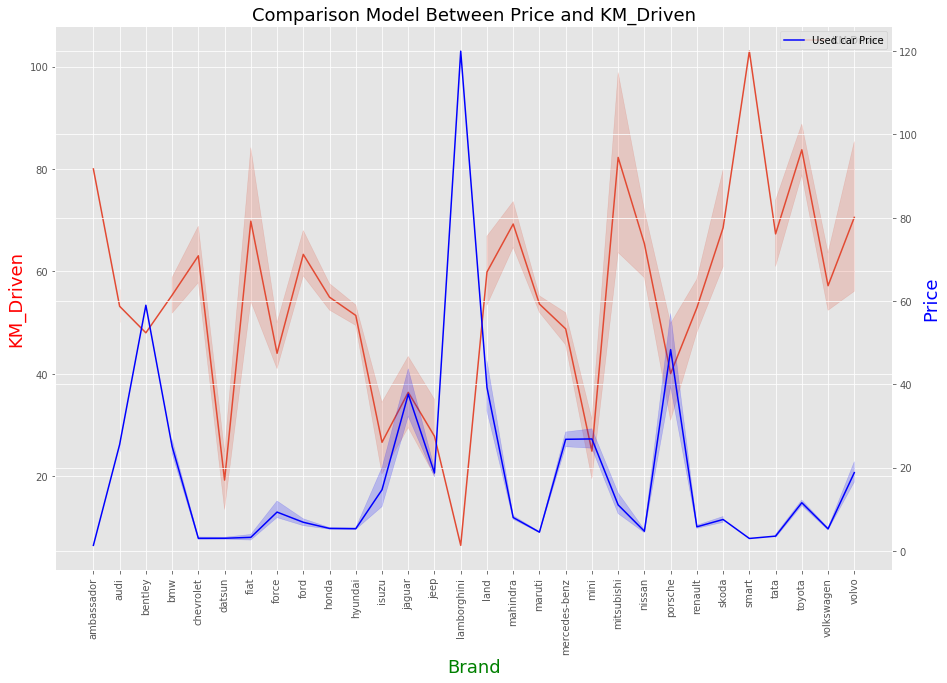

In [317]:
fig=plt.figure(figsize=(15,10))

plt.title('Comparison Model Between Price and KM_Driven', fontsize=18)
ax1 = sns.lineplot(data = cars1 , x="Brand" , y = 'KM_Driven' , label='KM Driven')
ax1.set_ylabel("KM_Driven",fontsize=18, color='red' )
ax1.set_xlabel("Brand",fontsize=18 ,color="green")
plt.xticks(rotation=90)

ax2 = ax1.twinx()

ax2=sns.lineplot(data = cars1 , x="Brand" , y = 'Price' , color='blue' , label = 'Used car Price')
ax2.set_ylabel("Price", fontsize=18, color="blue")

### Observation

The luxury sport cars such as BMW ,Audi, Jaguar, Mercedes-benz, Mini, Porsche have the good presevartion value in the used cars market.

You could consider to purchase a  **Dutsun** as this cars has the good preserve values for used car market in considering the affordablity if seems tha the luxury cars are more expensive.


# Machine Leraning

### Get basic idea of correlationship between variables 
#### Regression alogorithm perform well if the variables are independent to each other.

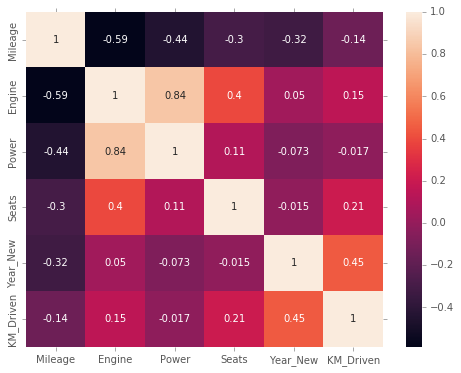

In [589]:
cars1X= cars1.drop(['Price', 'New_price' , 'Year'] , axis=1)

plt.figure(figsize = (8, 6))

sns.heatmap(cars1X.corr(), annot = True)

#### There high correlatioship between power and engine.

Means that power or engine could be represent each other.

Ideal way to drop one of them .

## Data preparation

**Divide the data into "attributes"(X) and "labels"(Y)**

Define labels/target = Price (Y)


**Output (Y) Predict used car price depends on the input of features/variables/attributes (X)**

In [590]:
cars1.head(1)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Variant,Year_New,KM_Driven,New_price
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,maruti,Wagon,R LXI CNG,9,72.0,5.49


In [591]:
## drop irrelevant features based on domain knowleadge and correlation heatmap.
X = cars1.drop(['Price', 'New_price' , 'Year', 'Engine','Name','Model' ,'Variant'],axis=1)
Y = cars1['Price']

In [592]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      6016 non-null   object 
 1   Fuel_Type     6016 non-null   object 
 2   Transmission  6016 non-null   object 
 3   Owner_Type    6016 non-null   object 
 4   Mileage       6016 non-null   float64
 5   Power         6016 non-null   float64
 6   Seats         6016 non-null   float64
 7   Brand         6016 non-null   object 
 8   Year_New      6016 non-null   int64  
 9   KM_Driven     6016 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 677.0+ KB


## Data preprocessing

### (A) One Hot  Encoding : 

Categorical variables to numeric  as most of the algorithms are designed to work on numeric data. 

### Categorical variables from database using encoding method :

1)Location	
2)Fuel_Type	
3)Transmission	
4)Owner_Type

Encoding method : one-hot encoding to transform a categorical feature with n possible classes into n binary features.

In [593]:
## get dummies to convert categorical to  numeric data
X_ENC = pd.get_dummies(X[['Location' , 'Fuel_Type' ,'Transmission' , 'Owner_Type']] ,drop_first=True)
X_ENC = pd.concat([X, X_ENC] , axis=1)
X_ENC.head()

X_ENC.drop(['Location' , 'Fuel_Type' ,'Transmission' , 'Owner_Type'] , axis=1 , inplace=True)

X_ENC.head()

,Mileage,Power,Seats,Brand,Year_New,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,26.60,58.16,5.0,maruti,9,72.00,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,19.67,126.20,5.0,hyundai,4,41.00,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,18.20,88.70,5.0,honda,8,46.00,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,20.77,88.76,7.0,maruti,7,87.00,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,15.20,140.80,5.0,audi,6,40.67,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Supervised learning : 

The machine learning task of learning a function that maps an input (X) to an output(Y) in this case is "Price"--- price of th used cars ,  based on example input-output pairs. 

It infers a function from labeled training data consisting of a set of training examples.


### (B) Bining for Mileage, Seats and Year_New

### (1) Developer Mileage Histogram

Text(0, 0.5, 'Frequency')

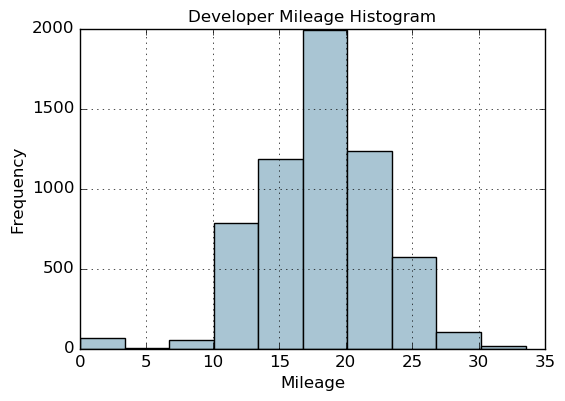

In [594]:
import matplotlib as mpl
%matplotlib inline

mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

# Visualize the distribution using histogram first

fig, ax = plt.subplots()
X_ENC['Mileage'].hist(color='#A9C5D3')

ax.set_title('Developer Mileage Histogram', fontsize=12)
ax.set_xlabel('Mileage', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### Fixed-width binning for Mileage data
### Bin the Mileage from zero to 39, 10 values in a range
Binning range

Age Range: Bin

0 -  9   : 0

10 - 19  : 1

20 - 29  : 2

30 - 39  : 3


In [595]:
## Bin the Mileage data
X_ENC['Mileage_bin'] = np.array(np.floor(np.array(X_ENC['Mileage']) / 10.))

## delete the Mileage column
del X_ENC['Mileage']

X_ENC.head()

,Power,Seats,Brand,Year_New,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin
0,58.16,5.0,maruti,9,72.00,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2.0
1,126.20,5.0,hyundai,4,41.00,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1.0
2,88.70,5.0,honda,8,46.00,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1.0
3,88.76,7.0,maruti,7,87.00,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,2.0
4,140.80,5.0,audi,6,40.67,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1.0


### (2)Developer Seats Histogram

In [596]:
X_ENC.Seats.max()

10.0

Text(0, 0.5, 'Frequency')

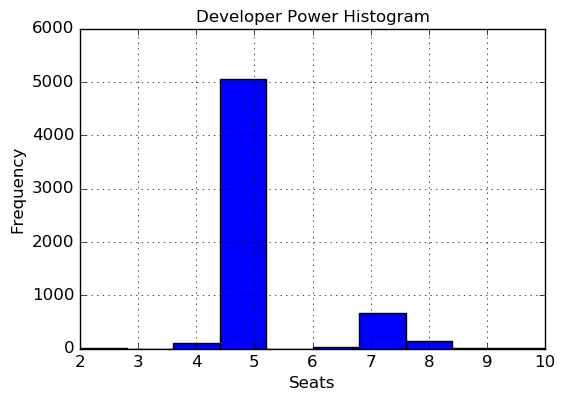

In [597]:
# Visualize the distribution using histogram first

fig, ax = plt.subplots()
X_ENC['Seats'].hist()

ax.set_title('Developer Power Histogram', fontsize=12)
ax.set_xlabel('Seats', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### Fixed-width binning for Mileage data
### Bin the Seats from zero to 14, 5  values in a range
Binning range

Age Range: Bin

0 -  4   : 0

5 - 9  : 1

10 - 14  : 2



In [598]:
## Bin the Seats data
X_ENC['Seats_bin'] = np.array(np.floor(np.array(X_ENC['Seats']) / 5.))

## delete the Seats column
del X_ENC['Seats']

X_ENC.head()

,Power,Brand,Year_New,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin
0,58.16,maruti,9,72.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.0,1.0
1,126.20,hyundai,4,41.00,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1.0,1.0
2,88.70,honda,8,46.00,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1.0,1.0
3,88.76,maruti,7,87.00,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,2.0,1.0
4,140.80,audi,6,40.67,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1.0,1.0


### (3) Developer Year_New Histogram

In [599]:
X_ENC.Year_New.max()

21

Text(0, 0.5, 'Frequency')

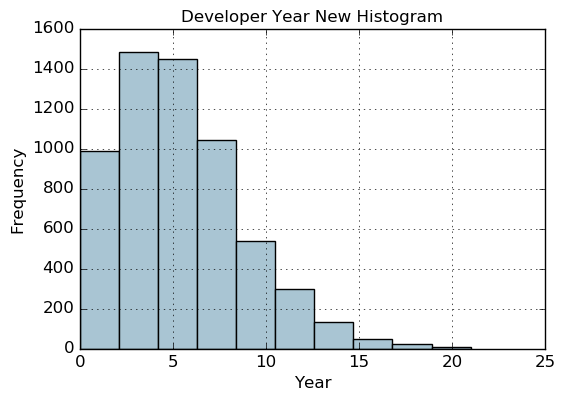

In [600]:
# Visualize the distribution using histogram first

fig, ax = plt.subplots()
X_ENC['Year_New'].hist(color='#A9C5D3')

ax.set_title('Developer Year New Histogram', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### Fixed-width binning for Mileage data
### Bin the Year from zero to 24 , 5  values in a range
Binning range

Age Range: Bin

0 -  4   : 0

5 - 9  : 1

10 - 14  : 2

15 - 19 : 3

20 - 24 :4


In [601]:
## Bin the Seats data
X_ENC['Year_bin'] = np.array(np.floor(np.array(X_ENC['Year_New']) / 5.))

## delete the Seats column
del X_ENC['Year_New']

X_ENC.head()

,Power,Brand,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin,Year_bin
0,58.16,maruti,72.00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2.0,1.0,1.0
1,126.20,hyundai,41.00,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1.0,1.0,0.0
2,88.70,honda,46.00,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1.0,1.0,1.0
3,88.76,maruti,87.00,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,2.0,1.0,1.0
4,140.80,audi,40.67,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1.0,1.0,1.0


### (C) Quantile base bining for Power

###  Developer Power Histogram

In [602]:
X_ENC.Power.max()

560.0

Text(0, 0.5, 'Frequency')

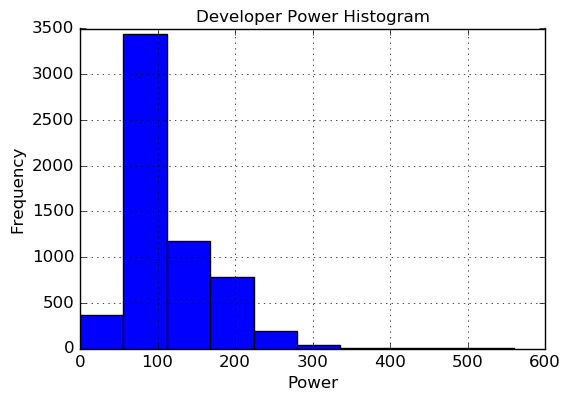

In [603]:
# Visualize the distribution using histogram first

fig, ax = plt.subplots()
X_ENC['Power'].hist()

ax.set_title('Developer Power Histogram', fontsize=12)
ax.set_xlabel('Power', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [604]:
# Defining our quantiles
quantile_list = [0, .25, .5, .75, 1.]

quantiles = X_ENC['Power'].quantile(quantile_list)  # specifying the range of quantiles; default is just 0.5 

quantiles

0.00      0.00
0.25     74.00
0.50     92.70
0.75    138.03
1.00    560.00
Name: Power, dtype: float64

Text(0, 0.5, 'Frequency')

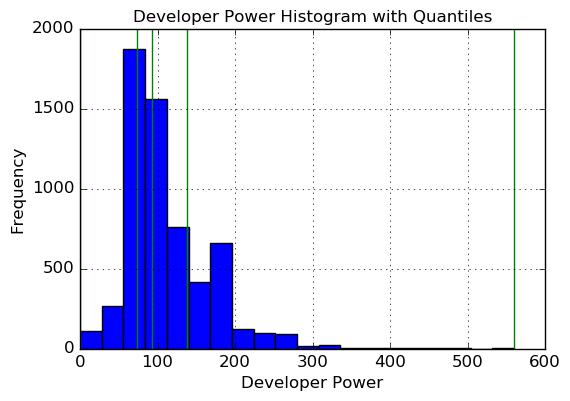

In [605]:
fig, ax = plt.subplots()
X_ENC['Power'].hist(bins=20)

# Plotting the red vertical line for each quantile
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='g')

ax.set_title('Developer Power Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Power', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [606]:
## define 4 quantile in 4 numeric range
quantile_labels = [0, 1, 2, 3] 

## create new column for power
X_ENC['Power_quantile_label'] = pd.qcut(X_ENC['Power'], 
                                                 q=quantile_list, labels=quantile_labels)
## delete the power column
del X_ENC['Power']

## check data
X_ENC.head()

,Brand,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,...,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label
0,maruti,72.00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2.0,1.0,1.0,0
1,hyundai,41.00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.0,1.0,0.0,2
2,honda,46.00,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1.0,1.0,1.0,1
3,maruti,87.00,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2.0,1.0,1.0,1
4,audi,40.67,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1.0,1.0,1.0,3


### (D) Log Transform for KM Driven

### Developer KM Driven Histogram

In [607]:
X_ENC.KM_Driven.max()

775.0

Text(0, 0.5, 'Frequency')

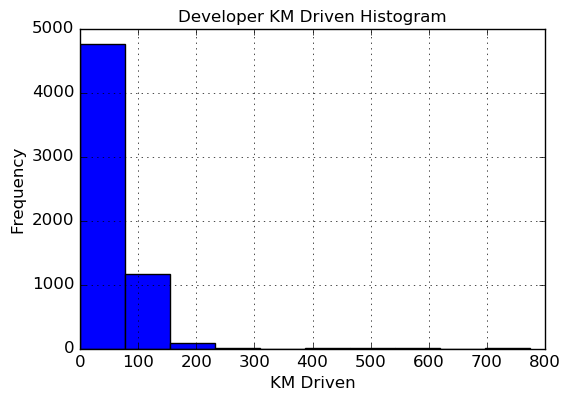

In [608]:
# Visualize the distribution using histogram first

fig, ax = plt.subplots()
X_ENC['KM_Driven'].hist()

ax.set_title('Developer KM Driven Histogram', fontsize=12)
ax.set_xlabel('KM Driven', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [609]:
## transform KM Driven to log
X_ENC['KM Driven_log'] = np.log((1+ X_ENC['KM_Driven']))

## check data
X_ENC[['KM_Driven', 'KM Driven_log']].iloc[0:5]

,KM_Driven,KM Driven_log
0,72.00,4.290459
1,41.00,3.737670
2,46.00,3.850148
3,87.00,4.477337
4,40.67,3.729781


In [610]:
## drop the KM_Driven coloumn
X_ENC.drop('KM_Driven' , axis=1, inplace=True)

## check the data
X_ENC.head()

,Brand,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label,KM Driven_log
0,maruti,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,2.0,1.0,1.0,0,4.290459
1,hyundai,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1.0,1.0,0.0,2,3.737670
2,honda,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1.0,1.0,1.0,1,3.850148
3,maruti,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,2.0,1.0,1.0,1,4.477337
4,audi,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1.0,1.0,1.0,3,3.729781


Text(4, 1100, '$\\mu$=3.88')

<Figure size 1000x800 with 0 Axes>

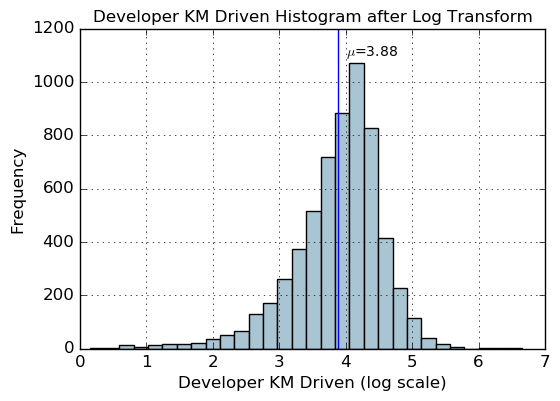

In [611]:
KMDriven_log_mean = np.round(np.mean(X_ENC['KM Driven_log']), 2)

plt.figure(figsize = (10, 8))

fig, ax = plt.subplots()
X_ENC['KM Driven_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(KMDriven_log_mean, color='b')
ax.set_title('Developer KM Driven Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer KM Driven (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(4, 1100, r'$\mu$='+str(KMDriven_log_mean), fontsize=10)

### (E) Frequency Encoding for Brand

In [612]:
# size of each category
Brand_encode = X_ENC.groupby('Brand').size()

# get frequency of each category
Brand_encode= Brand_encode/len(X_ENC)
X_ENC['Brand_freq'] =X_ENC.Brand.map(Brand_encode)

## Drop the Brand coloumn
del X_ENC['Brand']

## check the data
X_ENC.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label,KM Driven_log,Brand_freq
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2.0,1.0,1.0,0,4.290459,0.201297
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1.0,1.0,0.0,2,3.737670,0.184009
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1.0,1.0,1.0,1,3.850148,0.101064
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2.0,1.0,1.0,1,4.477337,0.201297
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1.0,1.0,1.0,3,3.729781,0.039229


## Data Splitting

#### split the data into training and test sets
#### 80% of the data to training set while 20% of the data to test set 
#### defalut 0.25% 


In [613]:
from sklearn.model_selection import train_test_split

X_ENC_train, X_ENC_test, Y_train, Y_test = train_test_split(X_ENC, Y, test_size=0.2, random_state=888)



In [614]:
# check the shape of x train and x test 
X_ENC_train.shape

(4812, 23)

In [615]:
X_ENC_test.shape

(1204, 23)

## Data Scaling for regressor algo

#### Scale the X_ENC train set and test set seperately

Important pre-processing step to standardizing/normalization  features by removing the mean and scaling to unit variance or to common level and then apply to further machine learning algorithm (regression or distance algo) to the input data.

To compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. This class is hence suitable for use in the early steps.

Scaling to train and test data individually to avoid bias.

In [616]:
## import library
from sklearn.preprocessing import StandardScaler

## scale for train set
sc = StandardScaler()

## fit and transform to train and test set
X_ENC_train_sc = sc.fit_transform(X_ENC_train)
X_ENC_test_sc = sc.fit_transform(X_ENC_test)

In [617]:
## transform train set to Data Frame
X_ENC_train_sc = pd.DataFrame(X_ENC_train_sc)
X_ENC_train_sc.columns = X_ENC.columns
X_ENC_train_sc.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label,KM Driven_log,Brand_freq
0,-0.244292,-0.300279,2.910746,-0.322763,-0.377426,-0.270018,-0.347323,-0.311251,-0.388485,-0.339381,...,-1.580219,-0.038168,-0.435788,-0.138837,-0.613890,0.134604,-1.023037,1.336040,-0.955971,-0.833851
1,-0.244292,-0.300279,-0.343555,-0.322763,2.649528,-0.270018,-0.347323,-0.311251,-0.388485,-0.339381,...,0.632824,-0.038168,-0.435788,-0.138837,-0.613890,0.134604,-1.023037,-1.333082,-0.069311,1.323920
2,-0.244292,-0.300279,-0.343555,-0.322763,2.649528,-0.270018,-0.347323,-0.311251,-0.388485,-0.339381,...,0.632824,-0.038168,2.294695,-0.138837,-0.613890,0.134604,1.799701,0.446333,2.106294,-0.514776
3,-0.244292,-0.300279,2.910746,-0.322763,-0.377426,-0.270018,-0.347323,-0.311251,-0.388485,-0.339381,...,0.632824,-0.038168,-0.435788,-0.138837,-0.613890,0.134604,-1.023037,-0.443375,0.850288,-1.028968
4,-0.244292,-0.300279,-0.343555,-0.322763,-0.377426,-0.270018,2.879162,-0.311251,-0.388485,-0.339381,...,-1.580219,-0.038168,-0.435788,-0.138837,1.347623,0.134604,-1.023037,1.336040,0.398276,-0.845328


In [618]:
## transform train set to Data Frame
X_ENC_test_sc = pd.DataFrame(X_ENC_test_sc)
X_ENC_test_sc.columns =X_ENC.columns
X_ENC_test_sc.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label,KM Driven_log,Brand_freq
0,-0.279083,-0.291006,-0.344904,3.322650,-0.365664,-0.27735,-0.352396,-0.317094,-0.388654,-0.340365,...,-1.590846,-0.040791,-0.446322,-0.136428,-0.655699,0.116785,0.415277,1.383424,0.812571,-1.107359
1,-0.279083,-0.291006,-0.344904,3.322650,-0.365664,-0.27735,-0.352396,-0.317094,-0.388654,-0.340365,...,-1.590846,-0.040791,-0.446322,-0.136428,-0.655699,0.116785,-1.029790,-0.411449,-0.789406,-0.101681
2,-0.279083,-0.291006,-0.344904,-0.300965,-0.365664,-0.27735,-0.352396,-0.317094,-0.388654,-0.340365,...,0.628596,-0.040791,-0.446322,-0.136428,1.342937,0.116785,-1.029790,0.485987,0.460913,1.051958
3,-0.279083,-0.291006,-0.344904,-0.300965,-0.365664,-0.27735,2.837716,-0.317094,-0.388654,-0.340365,...,0.628596,-0.040791,-0.446322,-0.136428,1.342937,0.116785,-1.029790,-1.308886,0.201668,1.292396
4,-0.279083,-0.291006,-0.344904,3.322650,-0.365664,-0.27735,-0.352396,-0.317094,-0.388654,-0.340365,...,-1.590846,-0.040791,-0.446322,-0.136428,-0.655699,0.116785,0.415277,1.383424,0.321933,-0.961709


## Model Building Pre Concept

### Core idea for regression algo:

#### Obtain a line that best fits the data points

#### Find the best fit line 
= The best fit line is the one for which total prediction error (for all data points) are as small as possible.

#### Error = distance between the points to the regression line.

### Supervised Regression Algorithm to try on 

1) ***Linear regression***\
2) ***XG Boost***\
2) ***Random Forest Regressor***

### Model evaluation/validation metrics for Regression algo : 

#### Check the accuracy using:
1.	**R -SQUARED**\
*measures the degree of variability in dependent variable\
*determines how well the model fits\
*score is 1.0 and it can be negative

#### Check the error using:
2.	**Root Mean Square Error(RMSE)**\
*positive values\
*how much our estimated values deviate from the actual values

3.	**Mean Absolute Error**\
*how much our predicted results deviate from the actual number


### Regularization method to be used when this two scenerio occurs

1) The no. of features more than no. of observations - Prone to overcomplexity

2) There is **multicollinearity in features** - Features are not independent and strongly correlated to each other. This increases variance and model tends to overfit the training data. Hence, low accuracy on the test / real world data. 

**Regularization helps to control these issues**


#### Regularization method 

1. **Ridge Regression**\
*reduction in coefficients magnitude\
*forces coefficients closer to 0 (but not 0)\
*shrinkage/ penalty, tuning parameter, λ

2. **Lasso Regression**\
*shrinkage/ penalty constraint\
*absolute weight coefficients\
*will actually push coefficients to 0\
*feature selection by eliminating inefficient coefficients

3. **Elastic Net Regression**
*combine of L2 and L1\
*shrink the coefficients as well as eliminate some of the insignificant coefficients

Idea of regularization : parameters that constrain, regularizes, or shrinks the coefficient estimates towards zero. Hence:

•Reduce magnitude
•Reduce fluctuations
•Reduce variance 
•Avoid overfitting 


### Random state set : 888 

The model trainig using the same subset for easy comparison on the performance

## Linear Regression

### Model Building

In [619]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

### Model Training 

In [620]:
# using Scikit-Learn's LinearRegression class to train the data

regressor.fit(X_ENC_train_sc, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [621]:
# intercept and slope calculated by the linear regression algorithm

print(regressor.intercept_)
print(regressor.coef_)

9.623167082294264
[ 0.61174727  0.27387456  1.05841     0.21319843  0.75924512  0.2067716
  0.37623211 -0.282137   -0.26757831  0.22561567  0.70287618 -0.00500046
 -2.31099592 -3.44842618 -0.03061345 -0.13904354  0.12810581 -1.89902407
 -1.80722276 -1.77726358  2.84950585 -2.13597939 -0.07589139]


### Model Testing

In [622]:
y_pred = regressor.predict(X_ENC_test_sc)

In [623]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
2216,6.75,20.325157
3659,5.95,15.085994
5388,7.75,8.701843
716,3.51,-0.715336
3702,10.00,21.362096


**MODEL EVALUATION**

Text(0.5, 0, 'True (ground truth)')

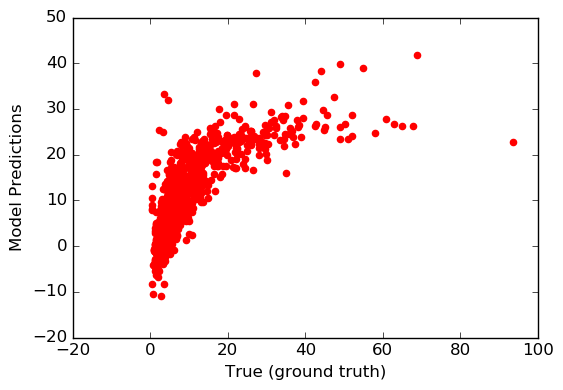

In [624]:
# Plot of predicted y values (Y axis) against actual y values (X axis) 
# The more closer the slope is to 45 degree angle, the more accurate

plt.scatter(Y_test, y_pred, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [625]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [627]:
r2_score(Y_test , y_pred)

0.563283999390193

In [628]:
k = X_ENC_test_sc.shape[1] # store no. of features as k
#n = len(X_test) # store no. of rows as n
n = X_ENC_test_sc.shape[0] 
print('k is ' ,k)
print('n is' , n)
#==== index 0 is rows , index 1 is col

r2 = r2_score(Y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) 

print('R2 score' , r2)
print('Adj r2' , adj_r2)

k is  23
n is 1204
R2 score 0.563283999390193
Adj r2 0.5547717383613577


In [226]:
# evaluate the performance of linear regression model using three metrics.

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 4.246107064660699
Root Mean Squared Error: 6.437605941758202


Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
 
R2 assumes that every single variable explains the variation in the dependent variable. 

The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

Compare R2 and adjusted R2 , not much diff means selected X acceptable

0.8 is good ...


### Regularization method

#### Perform Ridge regression and get R2 

In [227]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 

lr_ridge= Ridge()
lr_ridge.fit(X_ENC_train_sc, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [228]:
pred_lr_ridge = lr_ridge.predict(X_ENC_test_sc) #use the scaled X test
metrics.r2_score(Y_test , pred_lr_ridge) 

0.5633110838277631

#### Perform Lasso regression and get R2

In [229]:
lr_lasso = Lasso()
lr_lasso.fit(X_ENC_train_sc, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [230]:
pred_lr_lasso = lr_lasso.predict(X_ENC_test_sc)
metrics.r2_score(Y_test , pred_lr_lasso)

0.5396090649521261

#### Perform Elastic Net regression and get R2

In [231]:
lr_elasti = ElasticNet()
lr_elasti.fit(X_ENC_train_sc, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [232]:
pred_elasti = lr_elasti.predict(X_ENC_test_sc)
metrics.r2_score(Y_test , pred_elasti)

0.5441196608352944

### **Conclusion**
### golden values for R2 score=1
### may consider to : reselect the features
                 

### Types : Sequential Forward Selection (SFS) : using X_train_sc (scaled data ) for features selection

In [233]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
LR_SFS = SFS(regressor, 
          k_features= 'best', 
          forward=True, 
           cv=3)

In [234]:
sfsLGF = LR_SFS.fit(X_ENC_train_sc, Y_train)

In [235]:
sfsLGF.k_feature_names_

('Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Mileage_bin',
 'Seats_bin',
 'Year_bin',
 'Power_quantile_label',
 'KM Driven_log')

In [236]:
print('\nSelected feature indices:', sfsLGF.k_feature_idx_)
print('CV Score:', sfsLGF.k_score_)


Selected feature indices: (0, 2, 4, 6, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21)
CV Score: 0.5732183522004234


In [237]:
pd.DataFrame.from_dict(sfsLGF.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.3500334152979142, 0.35579566367914794, 0.31...",0.339889,"(Transmission_Manual,)",0.0417905,0.0185708,0.0131316
2,"(13, 20)","[0.4359094856593293, 0.43152123867212877, 0.41...",0.428225,"(Transmission_Manual, Power_quantile_label)",0.0179326,0.0079689,0.00563486
3,"(13, 19, 20)","[0.49033075648234326, 0.47872788936237465, 0.4...",0.481063,"(Transmission_Manual, Year_bin, Power_quantile...",0.0153391,0.0068164,0.00481992
4,"(13, 18, 19, 20)","[0.5299886131184776, 0.4946431545842225, 0.484...",0.503023,"(Transmission_Manual, Seats_bin, Year_bin, Pow...",0.0439217,0.0195179,0.0138013
5,"(10, 13, 18, 19, 20)","[0.5485936605649564, 0.5138354731085166, 0.513...",0.525237,"(Fuel_Type_Diesel, Transmission_Manual, Seats_...",0.0371699,0.0165175,0.0116797
6,"(10, 13, 17, 18, 19, 20)","[0.5630624761408389, 0.5295805453671714, 0.535...",0.542832,"(Fuel_Type_Diesel, Transmission_Manual, Mileag...",0.032703,0.0145325,0.0102761
7,"(10, 13, 17, 18, 19, 20, 21)","[0.5816162451411923, 0.5475892840009506, 0.554...",0.561308,"(Fuel_Type_Diesel, Transmission_Manual, Mileag...",0.0329715,0.0146519,0.0103604
8,"(8, 10, 13, 17, 18, 19, 20, 21)","[0.5831564829078018, 0.5489804214480085, 0.561...",0.564427,"(Location_Mumbai, Fuel_Type_Diesel, Transmissi...",0.0318292,0.0141442,0.0100015
9,"(7, 8, 10, 13, 17, 18, 19, 20, 21)","[0.5858744184004825, 0.5506653824132668, 0.567...",0.568073,"(Location_Kolkata, Location_Mumbai, Fuel_Type_...",0.0323524,0.0143767,0.0101659
10,"(7, 8, 10, 12, 13, 17, 18, 19, 20, 21)","[0.5862424665573053, 0.5528897218286473, 0.569...",0.569504,"(Location_Kolkata, Location_Mumbai, Fuel_Type_...",0.0306416,0.0136165,0.00962831


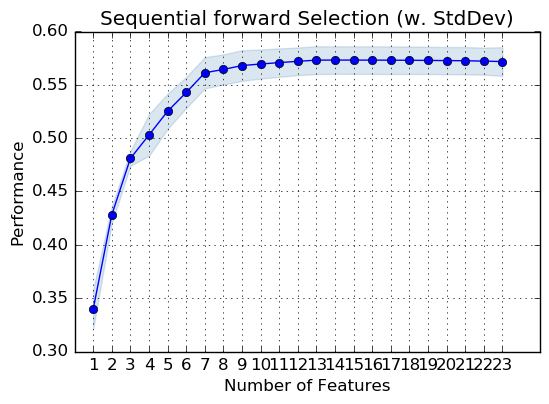

In [238]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfsLGF.get_metric_dict(), kind='std_dev')

plt.ylim([0.30, 0.60])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [146]:
X_train_scSFSLG = X_ENC_train_sc[['Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Mileage_bin',
 'Seats_bin',
 'Year_bin',
 'Power_quantile_label',
 'KM Driven_log']]

X_train_scSFSLG.head()

,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Kochi,Location_Kolkata,Location_Mumbai,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label,KM Driven_log
0,-0.244292,2.910746,-0.377426,-0.347323,-0.311251,-0.388485,0.932061,-0.910856,-1.580219,-0.613890,0.134604,-1.023037,1.336040,-0.955971
1,-0.244292,-0.343555,2.649528,-0.347323,-0.311251,-0.388485,-1.072891,1.097869,0.632824,-0.613890,0.134604,-1.023037,-1.333082,-0.069311
2,-0.244292,-0.343555,2.649528,-0.347323,-0.311251,-0.388485,0.932061,-0.910856,0.632824,-0.613890,0.134604,1.799701,0.446333,2.106294
3,-0.244292,2.910746,-0.377426,-0.347323,-0.311251,-0.388485,0.932061,-0.910856,0.632824,-0.613890,0.134604,-1.023037,-0.443375,0.850288
4,-0.244292,-0.343555,-0.377426,2.879162,-0.311251,-0.388485,0.932061,-0.910856,-1.580219,1.347623,0.134604,-1.023037,1.336040,0.398276


In [147]:
X_test_scSFSLG = X_ENC_test_sc[['Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Mileage_bin',
 'Seats_bin',
 'Year_bin',
 'Power_quantile_label',
 'KM Driven_log']]

X_test_scSFSLG.head()

,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Kochi,Location_Kolkata,Location_Mumbai,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Mileage_bin,Seats_bin,Year_bin,Power_quantile_label,KM Driven_log
0,-0.279083,-0.344904,-0.365664,-0.352396,-0.317094,-0.388654,0.956112,-0.938749,-1.590846,-0.655699,0.116785,0.415277,1.383424,0.812571
1,-0.279083,-0.344904,-0.365664,-0.352396,-0.317094,-0.388654,-1.045903,1.065247,-1.590846,-0.655699,0.116785,-1.029790,-0.411449,-0.789406
2,-0.279083,-0.344904,-0.365664,-0.352396,-0.317094,-0.388654,0.956112,-0.938749,0.628596,1.342937,0.116785,-1.029790,0.485987,0.460913
3,-0.279083,-0.344904,-0.365664,2.837716,-0.317094,-0.388654,-1.045903,1.065247,0.628596,1.342937,0.116785,-1.029790,-1.308886,0.201668
4,-0.279083,-0.344904,-0.365664,-0.352396,-0.317094,-0.388654,0.956112,-0.938749,-1.590846,-0.655699,0.116785,0.415277,1.383424,0.321933


### Linear Regression with important features (X_train/test_scSFSLG)

In [148]:
regressor.fit(X_train_scSFSLG, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
# intercept and slope calculated by the linear regression algorithm

print(regressor.intercept_)
print(regressor.coef_)

9.623167082294264
[ 0.43221993  0.83675951  0.51935205  0.16028291 -0.48244178 -0.50837908
  0.77084361 -2.26281865 -3.45397638 -1.91280882 -1.8151102  -1.77962064
  2.86371198 -2.13507765]


In [150]:
y_pred = regressor.predict(X_test_scSFSLG)

In [239]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
2216,6.75,20.325157
3659,5.95,15.085994
5388,7.75,8.701843
716,3.51,-0.715336
3702,10.00,21.362096


In [240]:
r2_score(Y_test , y_pred)

0.563283999390193

In [241]:
k = X_test_scSFSLG.shape[1] # store no. of features as k
#n = len(X_test) # store no. of rows as n
n = X_test_scSFSLG.shape[0] 
print('k is ' ,k)
print('n is' , n)
#==== index 0 is rows , index 1 is col

r2 = r2_score(Y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) 

print('R2 score' , r2)
print('Adj r2' , adj_r2)

k is  14
n is 1204
R2 score 0.563283999390193
Adj r2 0.5581418429490346


## XGBoost regressor

#### Import library

### Model Building

In [242]:
import xgboost as xgb

xgb_sklearn = xgb.sklearn.XGBRegressor(random_state=888)

### Model Training

In [243]:
xgb_sklearn.fit(X_ENC_train_sc , Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=888, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Model Teating

In [244]:
result = xgb_sklearn.predict(X_ENC_test_sc)

### Model Evaluation

In [245]:
r2_score(Y_test , result)

0.692102560735219

### Features importance

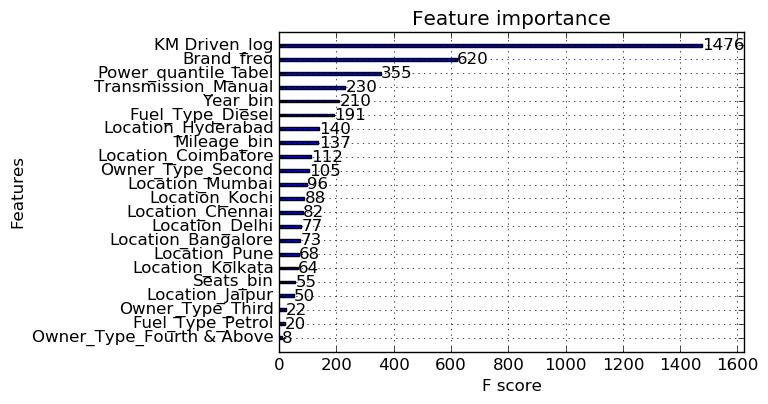

In [246]:
xgb.plot_importance(xgb_sklearn)

# plotting API
# Output F score = feature score 
# Rough intuition:
# sum up the feature importances of the individual trees, then divide by the total number of trees

### XG Boost with important features (X_train/test_scSFSLG)

In [247]:
xgb_sklearn.fit(X_train_scSFSLG , Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=888, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [248]:
result = xgb_sklearn.predict(X_test_scSFSLG)

In [249]:
r2_score(Y_test , result)

0.6820881784156074

## Random Forest Regressor 

### Model Building  and training

In [250]:
from sklearn.ensemble import RandomForestRegressor 


RFRegressor = RandomForestRegressor(random_state = 888) 

RFRegressor.fit(X_ENC_train_sc, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=888, verbose=0, warm_start=False)

### Model testing

In [251]:
y_pred =RFRegressor.predict(X_ENC_test_sc)

In [252]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
2216,6.75,9.155500
3659,5.95,6.220800
5388,7.75,6.838500
716,3.51,3.794900
3702,10.00,20.254545


### Model evaluation and validation

In [253]:
r2_score(Y_test , y_pred)

0.7496932598868993

### Features important for Randon Forest Regressor

In [254]:
len(RFRegressor.feature_importances_)

23

In [255]:
RFRegressor.feature_importances_

array([8.32311777e-03, 5.56687189e-03, 9.35868155e-03, 4.47497855e-03,
       1.23251974e-02, 1.10750387e-03, 5.63525366e-03, 3.95854909e-03,
       5.93650447e-03, 3.08361654e-03, 1.09414725e-02, 5.38368946e-07,
       1.19371491e-02, 5.56285665e-02, 1.38004132e-05, 4.77968960e-03,
       2.67209607e-03, 9.44983550e-03, 1.89592804e-02, 1.04764015e-01,
       4.43526753e-01, 1.60435978e-01, 1.17120551e-01])

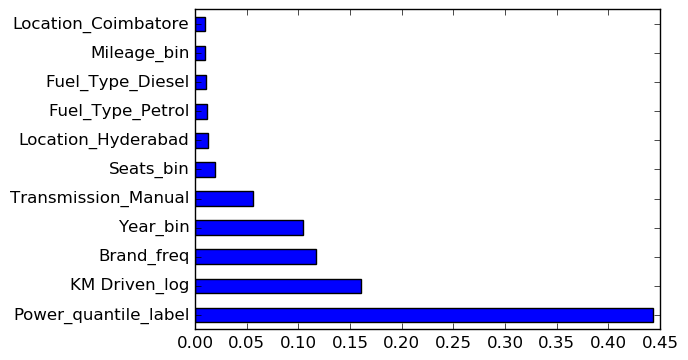

In [256]:
feat_importances = pd.Series(RFRegressor.feature_importances_ , index=X_ENC_test_sc.columns)
feat_importances.nlargest(11).plot(kind='barh')


### Model Tuning with Hyperparameter and Grid Search CV

**Hyperparameter Random Forest Regressor:**

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

**Grid Search CV :**

Loop through predefined hyperparameters and fit your estimator (model) on your training set. In addition to that, we can specify the number of times for the cross-validation for each set of hyperparameters

###  Model Traning and testing using Hyperparameter and  Grid Search CV

In [257]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search refer below :random search---A
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
RFRegressor = RandomForestRegressor(random_state=888)

# grid search model
grid_model = GridSearchCV(estimator = RFRegressor , param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

### Model traning with grid search and hyperparameter

In [258]:
grid_model.fit(X_ENC_train_sc, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=888,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

### Get the best parameters

In [259]:
grid_model.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

### Model testing with best parameters

In [260]:
y_pred_RFRegressor =grid_model.predict(X_ENC_test_sc)

In [261]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted':y_pred_RFRegressor})

df.head()

,Actual,Predicted
2216,6.75,15.160972
3659,5.95,7.776887
5388,7.75,7.016592
716,3.51,4.128684
3702,10.00,18.793661


### Model evaluation and validation 

In [262]:
r2_score(Y_test , y_pred)

0.7496932598868993

In [263]:
k = X_ENC_test_sc.shape[1] # store no. of features as k
#n = len(X_test) # store no. of rows as n
n = X_ENC_test_sc.shape[0] 
print('k is ' ,k)
print('n is' , n)
#==== index 0 is rows , index 1 is col

r2 = r2_score(Y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) 

print('R2 score' , r2)
print('Adj r2' , adj_r2)

k is  23
n is 1204
R2 score 0.7496932598868993
Adj r2 0.7448143996982541


### (A) ---Random search for hyperparameter using Random Search CV

In [264]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

param_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(param_random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### Using top 5 features importance to tune the Random Forest Regressor 

In [265]:
X_train_FI = X_ENC_train_sc[['Transmission_Manual',
 'Brand_freq', 'Year_bin',
 'Power_quantile_label',
 'KM Driven_log']]
 
 

In [266]:
X_test_FI = X_ENC_test_sc[['Transmission_Manual',
 'Brand_freq', 'Year_bin',
 'Power_quantile_label',
 'KM Driven_log']]
 

In [267]:
grid_model.fit(X_train_FI, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=888,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [268]:
X_test_FI = X_ENC_test_sc[['Transmission_Manual',
 'Brand_freq', 'Year_bin',
 'Power_quantile_label',
 'KM Driven_log']]
 

In [269]:
y_pred_RFFI =grid_model.predict(X_test_FI)

In [270]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted':y_pred_RFFI})

df.head()

,Actual,Predicted
2216,6.75,8.029000
3659,5.95,7.095236
5388,7.75,8.851401
716,3.51,5.462764
3702,10.00,20.074548


In [271]:
r2_score(Y_test ,y_pred_RFFI)

0.6849734167370471

## Conclusion

### Will recommend Random Forest Regressor as the Model in predicting the use car pricing as the performance of RF Regressor are the best comparison to Linear Regresson adn XG Boost.

### Benefits gaining from using RF as a model : 

***Overfitting :***\
Random Forest do not over fit and the performance not decrease as the number of trees increases. Hence, after certain number of trees the performance tend to stay in a certain value. 

***Balance the bias and variance issues in the model training.***\
Too many data tend to high variance.\
Too little data tend to high bias\
***The middle inflexion point right before total error\
increases is our sweet spot: the balance between bias and variance.

***Able to perform well despite of :***|
-missing data and not be affected when some proportion of data are missing.
– Not sensitive to outliers.
– Does not require feature scaling

***One of powerful and useful function of RF is able to output important features.***

## Relatioship between the features and used car price

### What things should they take note to preserve the value of their cars during resale? 

### There are 5 major things to be take note in preserve the value of the cars : 

1) The relationship between the features and the used car price. 

2) The condition of the used car price .

3) The consumer buying behaviour.

4) The government policy

5) The fuel price

####  For numeric data 

From the data analysis and EDA , the relatioship are group into two categories :

1) Positive related features: 

The price and the fetures moving at the same direction. There are : 

Engine
Power
Year

2) Negative related features: 

The price and the fetures moving at the opposite direction. There are : 

Kilomertres Driven
Mileage
New Price


####  For categorical data

For categorical data , the relationship of the features are highly depends on the condition and the buying behaviour of the car owner . The better the conditions of the car the better the used car price. 

Condition of the used cars ranking based 4 categories : 
(Using Kelley Blue Book Online: Vehicle Condition)

1) Excellent condition :
>>> vehicle has never had any paint or body work and is free of rust.
>>> clean Title History and will pass a smog and safety inspection
>>> engine compartment is clean, with no fluid leaks and is free of any wear or visible defect

2) Good condition :
>>> free of any major defects
>>> vehicle has a clean Title History, the paint, body and interior have only minor (if any) blemishes, and there are no major mechanical problem
>>> little or no rust on this vehicle.
>>> need some reconditioning to be sold at retail

3) Fair condition :
>>> vehicle has some mechanical or cosmetic defects and needs servicing but is still in reasonable running condition
>>> has a clean Title History, the paint, body and/or interior need work performed by a professional
>>> The tires may need to be replaced. There may be some repairable rust damage.

4) Poor condition:
>>> severe mechanical and/or cosmetic defects and is in poor running condition
>>> have problems that cannot be readily fixed such as a damaged frame or a rusted-through body
>>> branded title (salvage, flood, etc.) or unsubstantiated mileage is considered "poor."


#### The consumer buying behaviour.

According to a study by Google Kantar TNS about 90% of car purchases in India are digitally driven.

